In [1]:
import sys
sys.path.append("../src")

In [2]:
from utils.load_model import get_model

from my_model.my_dataset import get_ilsvrc2012

In [3]:
from utils.tensortracker import TensorTracker

In [4]:
import torch

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [5]:
dataset = get_ilsvrc2012(mode="test")

In [6]:
N = 100
perm = np.random.permutation(len(dataset))
images = torch.stack([dataset[i][0] for i in perm[:N]])

In [7]:
model = get_model("resnet34-skip4", onto_device="cpu")
model = model.eval()

In [8]:
tracker = TensorTracker(model)

In [9]:
_ = model(images)

In [10]:
tracker.fmap_pool.keys()

odict_keys(['conv1', 'bn1', 'relu', 'maxpool', 'layer1.0.conv1', 'layer1.0.bn1', 'layer1.0.relu1', 'layer1.0.conv2', 'layer1.0.bn2', 'layer1.0.add_func', 'layer1.0.relu2', 'layer1.0', 'layer1.1.conv1', 'layer1.1.bn1', 'layer1.1.relu1', 'layer1.1.conv2', 'layer1.1.bn2', 'layer1.1.add_func', 'layer1.1.relu2', 'layer1.1', 'layer1.2.conv1', 'layer1.2.bn1', 'layer1.2.relu1', 'layer1.2.conv2', 'layer1.2.bn2', 'layer1.2.add_func', 'layer1.2.relu2', 'layer1.2', 'layer1', 'layer2.0.conv1', 'layer2.0.bn1', 'layer2.0.relu1', 'layer2.0.conv2', 'layer2.0.bn2', 'layer2.0.downsample.0', 'layer2.0.downsample.1', 'layer2.0.downsample', 'layer2.0.add_func', 'layer2.0.relu2', 'layer2.0', 'layer2.1.conv1', 'layer2.1.bn1', 'layer2.1.relu1', 'layer2.1.conv2', 'layer2.1.bn2', 'layer2.1.add_func', 'layer2.1.relu2', 'layer2.1', 'layer2.2.conv1', 'layer2.2.bn1', 'layer2.2.relu1', 'layer2.2.conv2', 'layer2.2.bn2', 'layer2.2.add_func', 'layer2.2.relu2', 'layer2.2', 'layer2.3.conv1', 'layer2.3.bn1', 'layer2.3.relu

In [11]:
for key in tracker.fmap_pool:    
    if "bn2" in key:
        print("'{}',".format(key))
for key in tracker.fmap_pool:
    if "relu2" in key:
        print("'{}',".format(key))
for key in tracker.fmap_pool:
    if "downsample" in key:
        print("'{}',".format(key))

'layer1.0.bn2',
'layer1.1.bn2',
'layer1.2.bn2',
'layer2.0.bn2',
'layer2.1.bn2',
'layer2.2.bn2',
'layer2.3.bn2',
'layer3.0.bn2',
'layer3.1.bn2',
'layer3.2.bn2',
'layer3.3.bn2',
'layer3.4.bn2',
'layer3.5.bn2',
'layer4.0.bn2',
'layer4.1.bn2',
'layer4.2.bn2',
'layer1.0.relu2',
'layer1.1.relu2',
'layer1.2.relu2',
'layer2.0.relu2',
'layer2.1.relu2',
'layer2.2.relu2',
'layer2.3.relu2',
'layer3.0.relu2',
'layer3.1.relu2',
'layer3.2.relu2',
'layer3.3.relu2',
'layer3.4.relu2',
'layer3.5.relu2',
'layer4.0.relu2',
'layer4.1.relu2',
'layer4.2.relu2',
'layer2.0.downsample.0',
'layer2.0.downsample.1',
'layer2.0.downsample',
'layer3.0.downsample.0',
'layer3.0.downsample.1',
'layer3.0.downsample',
'layer4.0.downsample.0',
'layer4.0.downsample.1',
'layer4.0.downsample',


In [12]:
plain_target_layer = [
    'layer1.0.bn2',
    'layer1.1.bn2',
    'layer1.2.bn2',
    'layer2.0.bn2',
    'layer2.1.bn2',
    'layer2.2.bn2',
    'layer2.3.bn2',
    'layer3.0.bn2',
    'layer3.1.bn2',
    'layer3.2.bn2',
    'layer3.3.bn2',
    'layer3.4.bn2',
    'layer3.5.bn2',
    'layer4.0.bn2',
    'layer4.1.bn2',
    'layer4.2.bn2',
]

In [13]:
skip_target_layer = [
    'maxpool',
    'layer1.0.relu2',
    'layer1.1.relu2',
#     'layer1.2.relu2',
    'layer2.0.downsample',
    'layer2.0.relu2',
    'layer2.1.relu2',
    'layer2.2.relu2',
#     'layer2.3.relu2',
    'layer3.0.downsample',
    'layer3.0.relu2',
    'layer3.1.relu2',
    'layer3.2.relu2',
    'layer3.3.relu2',
    'layer3.4.relu2',
#     'layer3.5.relu2',
    'layer4.0.downsample',
    'layer4.0.relu2',
    'layer4.1.relu2',
    'layer4.2.relu2',
]

In [14]:
datas = {}
for key_skip, key_plain in zip(skip_target_layer, plain_target_layer):
    print(key_skip, key_plain)
    skip_feature = tracker.fmap_pool[key_skip]
    skip_norm = torch.norm(skip_feature, p=None, dim=(-2, -1))
    plain_feature = tracker.fmap_pool[key_plain]
    plain_norm = torch.norm(plain_feature, p=None, dim=(-2, -1))
    datas[key_plain] = (skip_norm, plain_norm)

maxpool layer1.0.bn2
layer1.0.relu2 layer1.1.bn2
layer1.1.relu2 layer1.2.bn2
layer2.0.downsample layer2.0.bn2
layer2.0.relu2 layer2.1.bn2
layer2.1.relu2 layer2.2.bn2
layer2.2.relu2 layer2.3.bn2
layer3.0.downsample layer3.0.bn2
layer3.0.relu2 layer3.1.bn2
layer3.1.relu2 layer3.2.bn2
layer3.2.relu2 layer3.3.bn2
layer3.3.relu2 layer3.4.bn2
layer3.4.relu2 layer3.5.bn2
layer4.0.downsample layer4.0.bn2
layer4.0.relu2 layer4.1.bn2
layer4.1.relu2 layer4.2.bn2


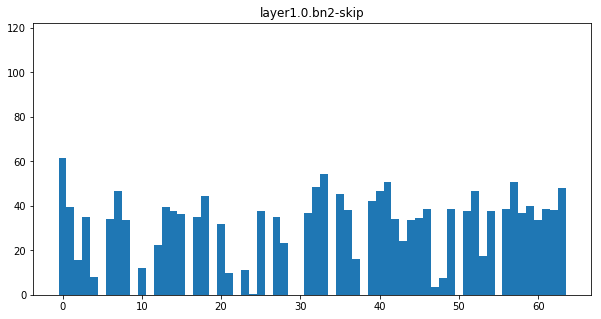

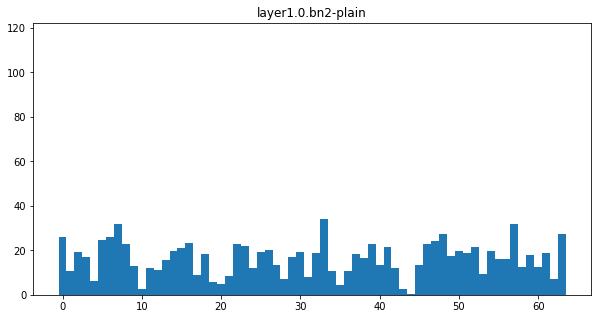

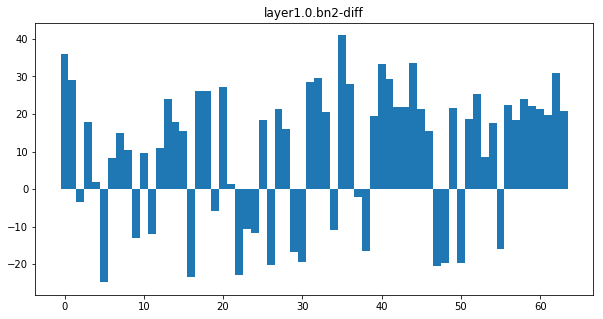

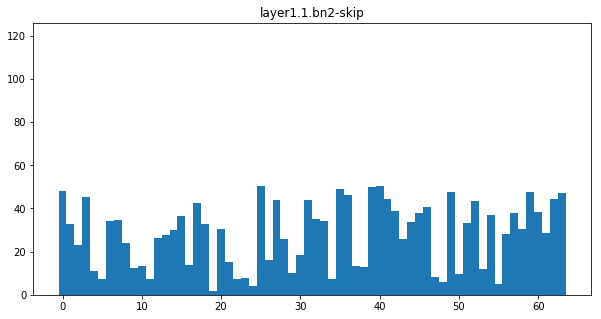

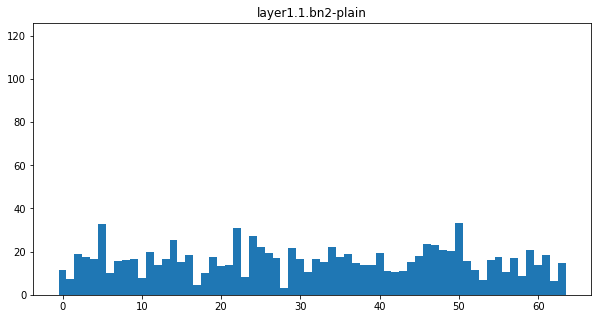

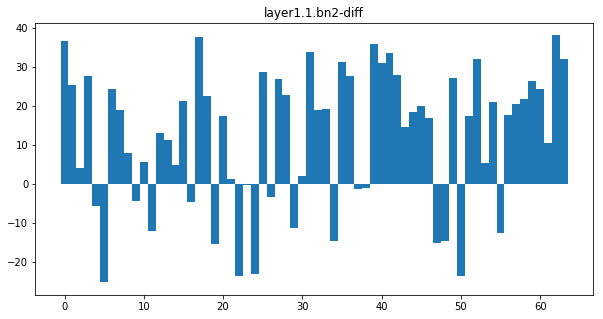

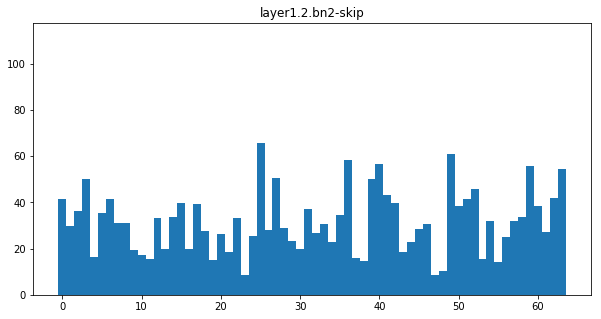

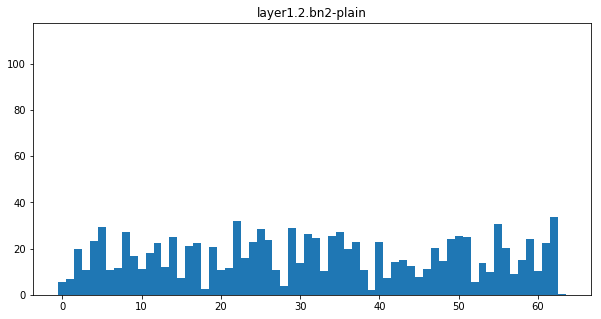

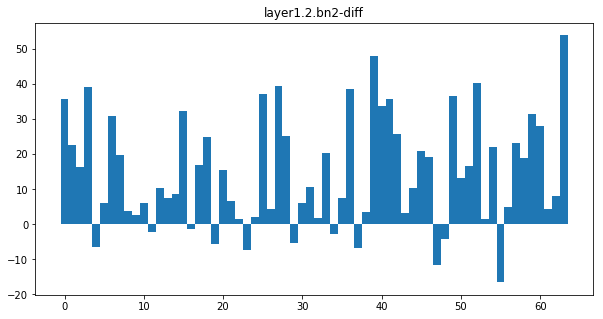

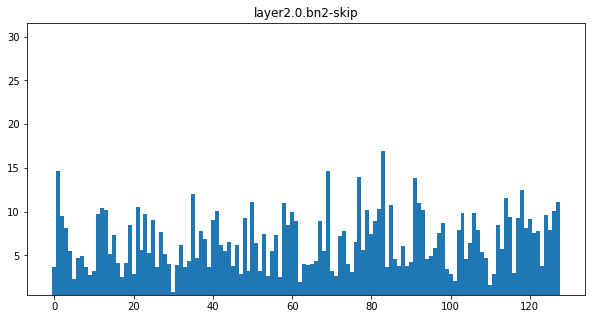

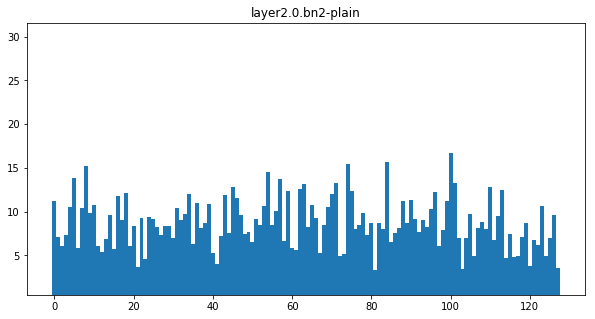

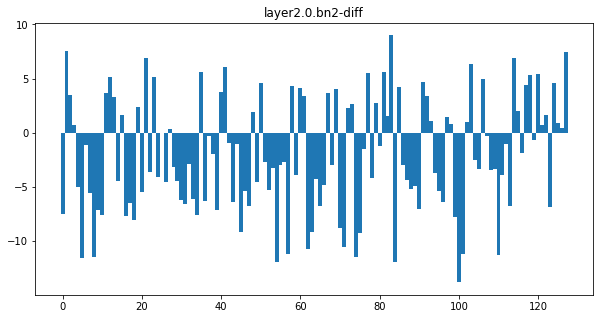

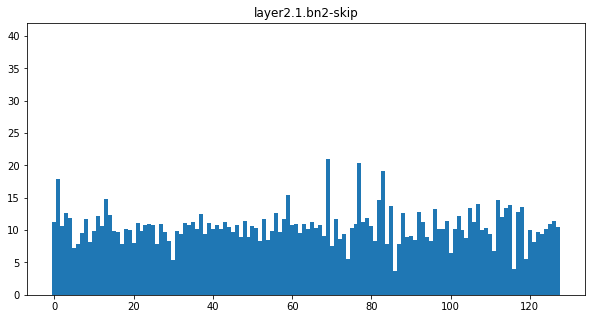

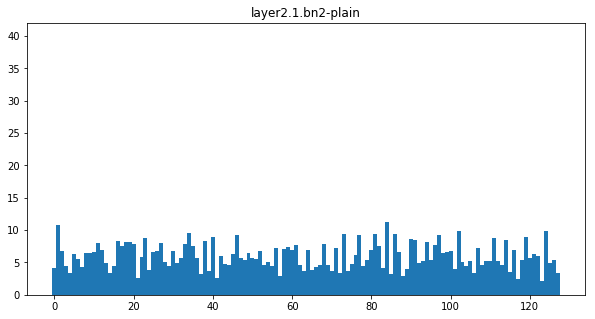

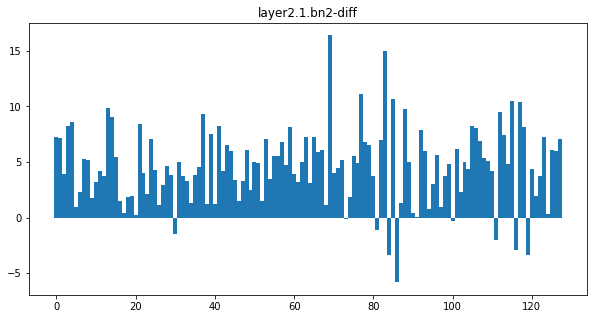

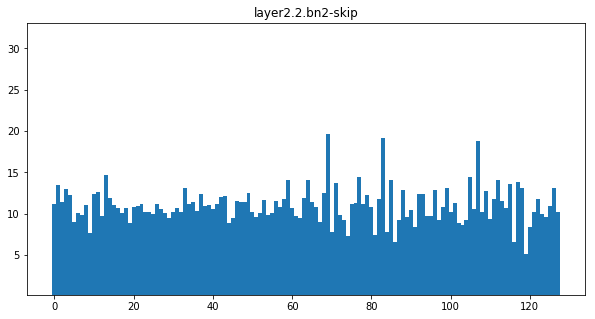

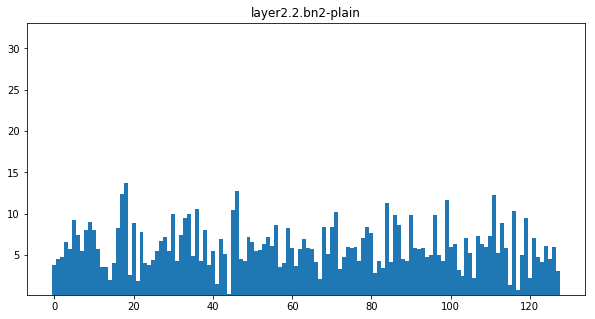

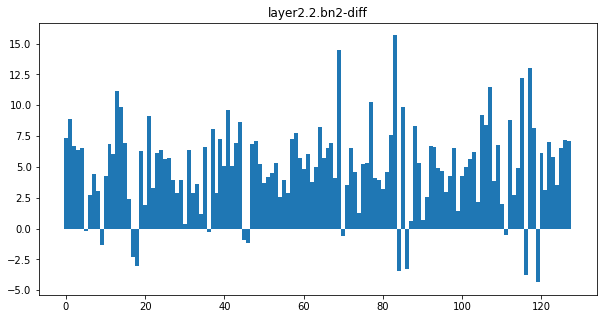

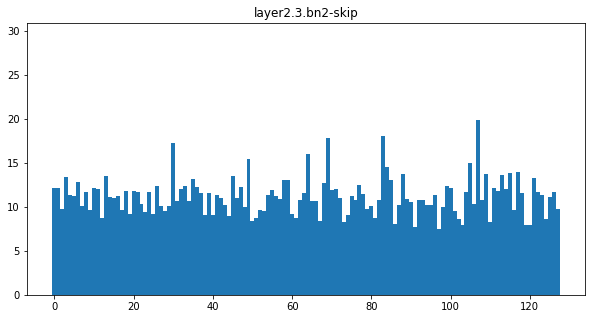

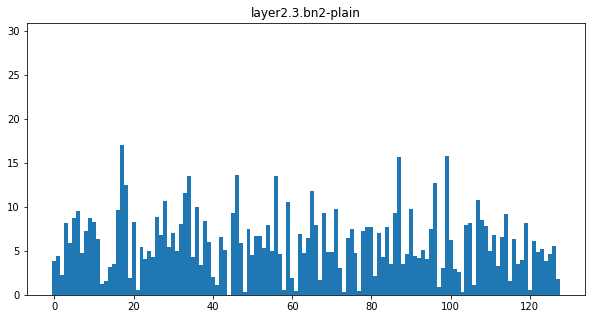

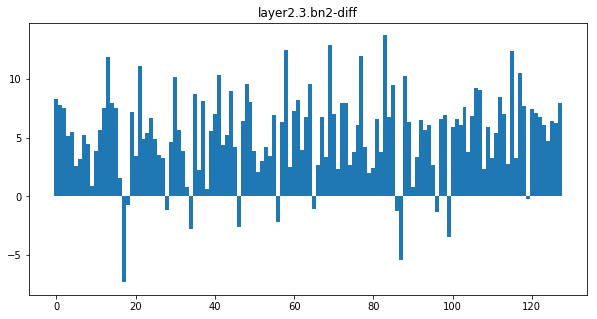

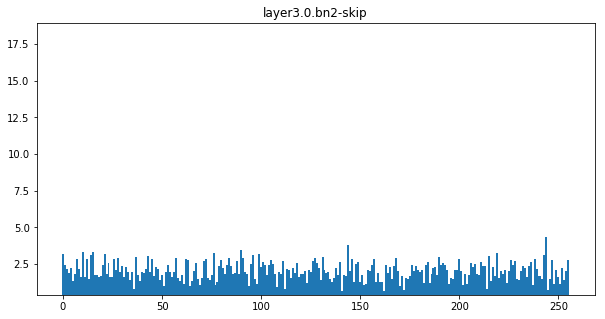

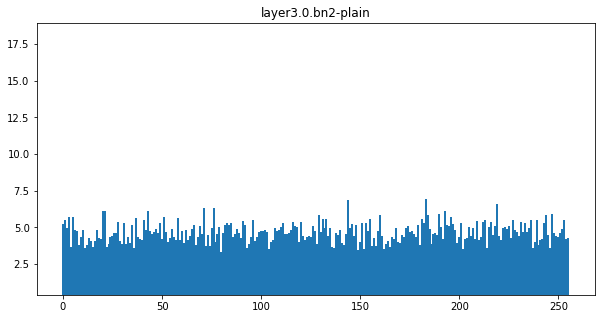

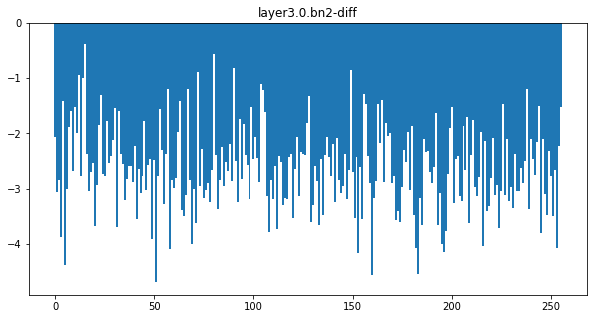

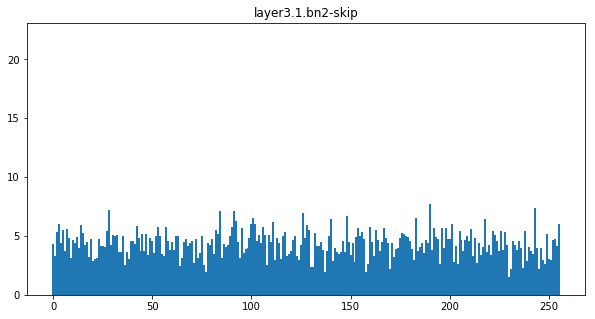

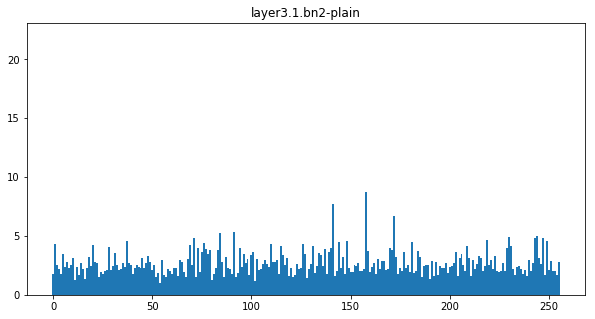

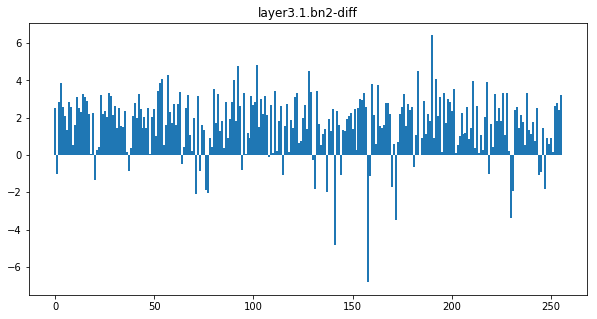

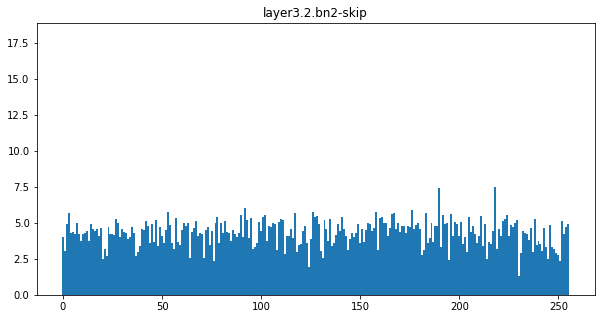

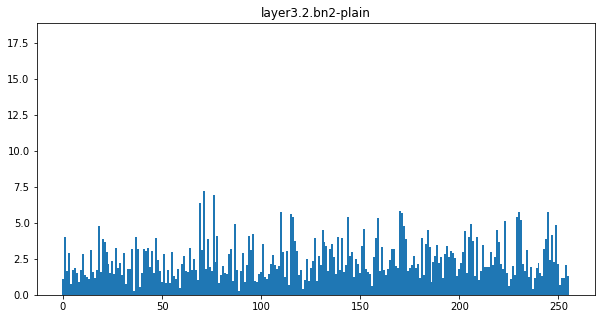

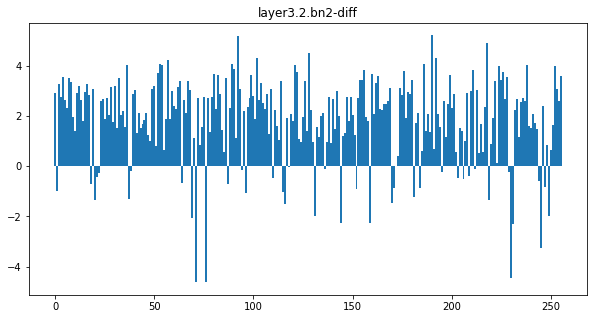

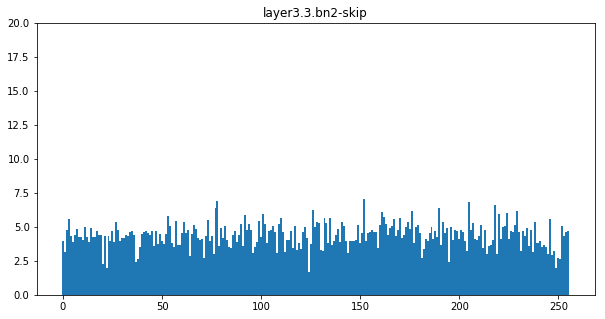

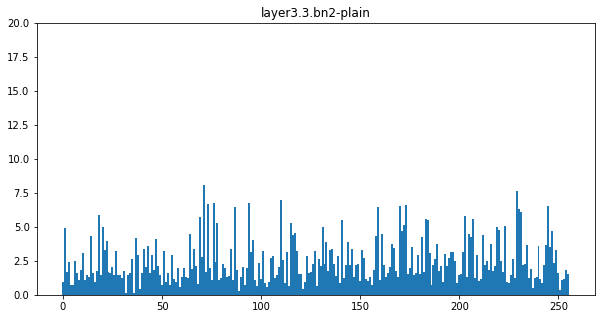

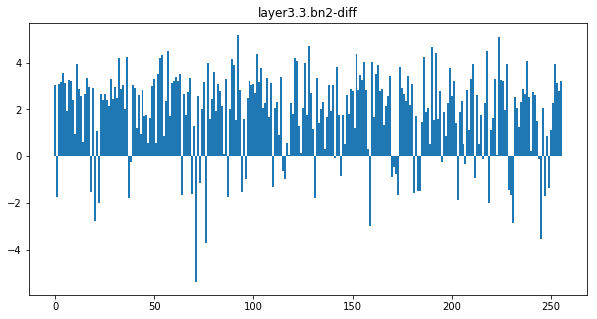

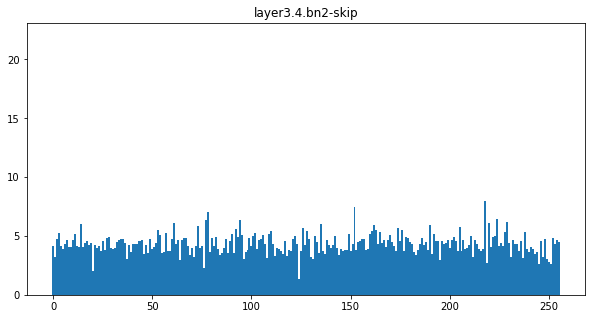

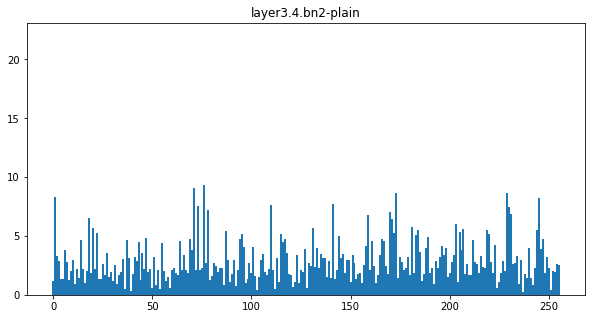

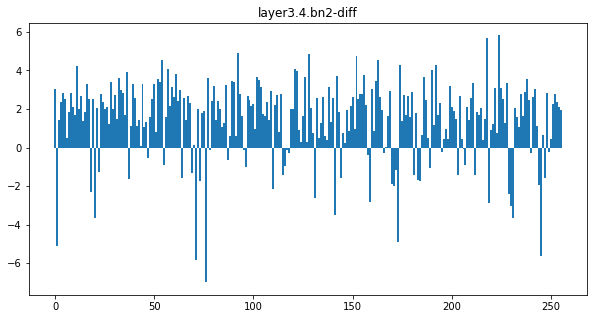

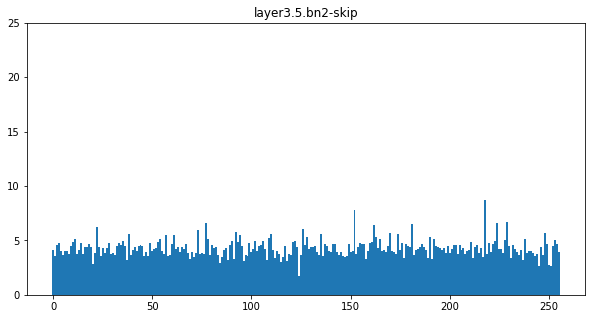

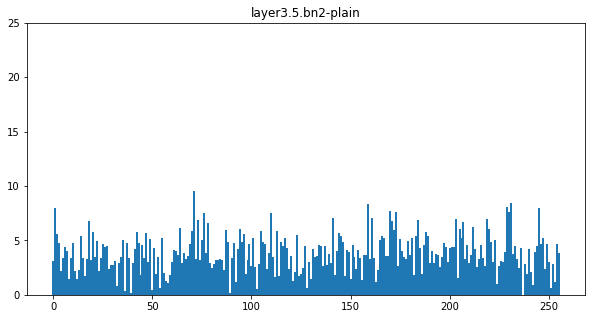

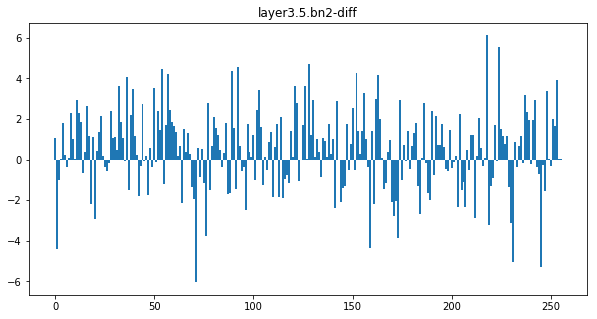

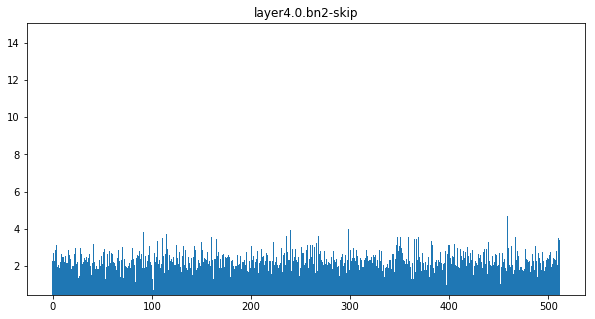

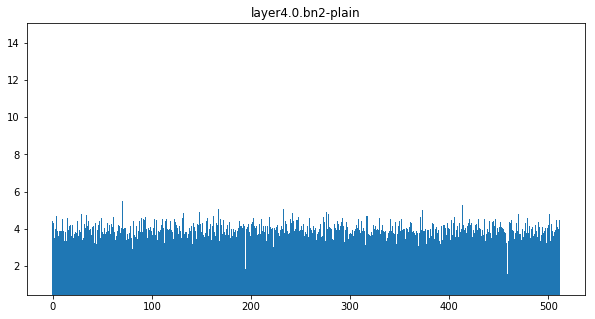

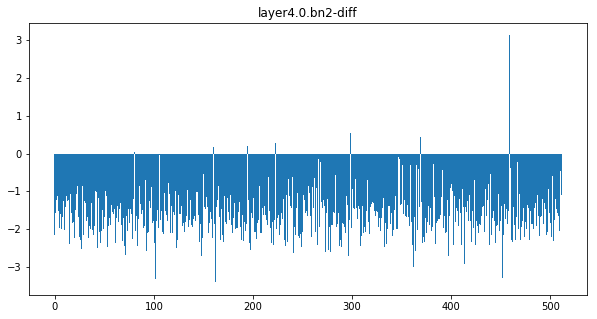

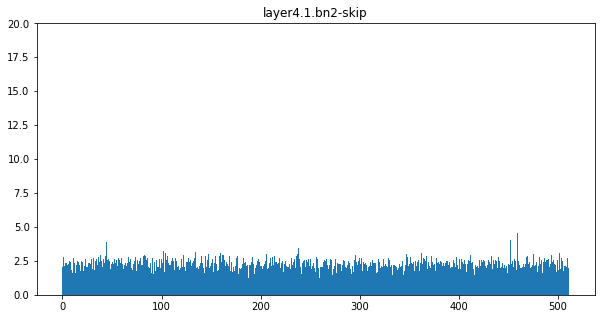

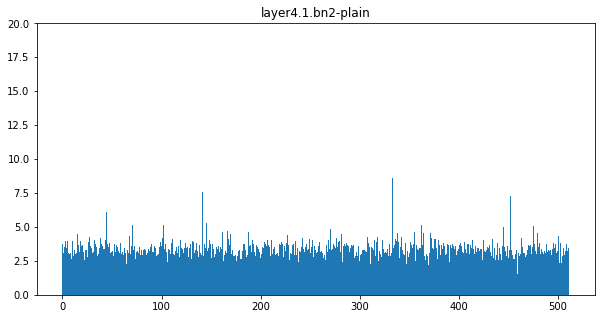

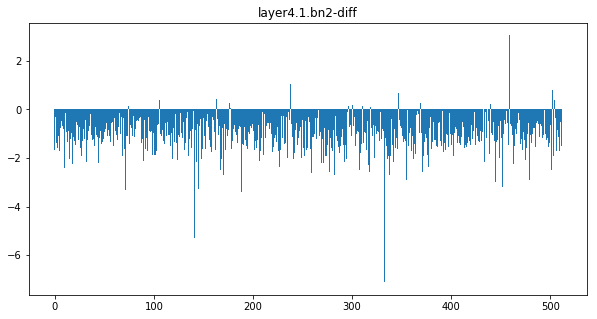

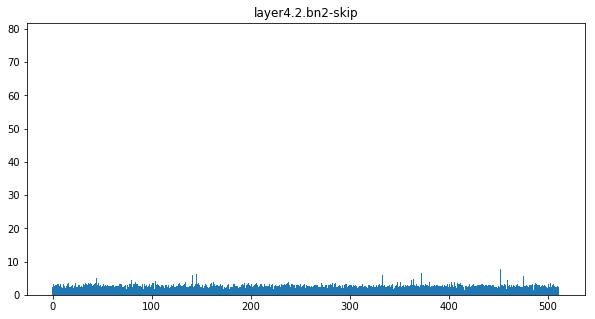

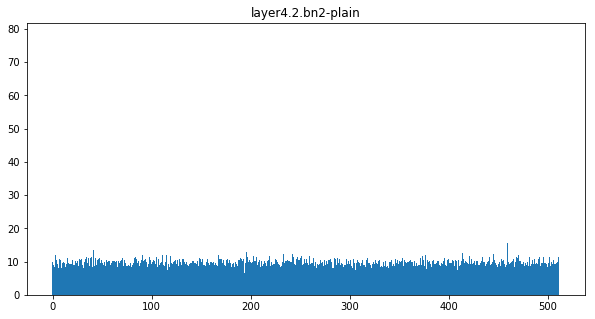

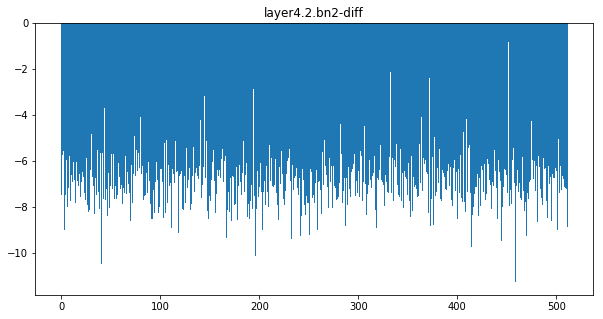

In [15]:
figsize = (10, 5)
for key, value in datas.items():
    skip_norm, plain_norm = value
    
    skip_vmax = skip_norm.max().item()
    skip_vmin = skip_norm.min().item()
    plain_vmax = plain_norm.max().item()
    plain_vmin = plain_norm.min().item()
    vmax = skip_vmax if skip_vmax > plain_vmax else plain_vmax
    vmin = skip_vmin if skip_vmin < plain_vmin else plain_vmin
    
    data = skip_norm.mean(0).numpy()
    y = data
    x = np.arange(len(y))
    plt.figure(figsize=figsize)
    plt.title("{}-skip".format(key))
    plt.bar(x, y, width=1.0)
    plt.ylim(vmin, vmax)
    plt.show()
    
    data = plain_norm.mean(0).numpy()
    y = data
    x = np.arange(len(y))
    plt.figure(figsize=figsize)
    plt.title("{}-plain".format(key))
    plt.bar(x, y, width=1.0)
    plt.ylim(vmin, vmax)
    plt.show()
    
    data = (skip_norm - plain_norm).mean(0).numpy()
    y = data
    x = np.arange(len(y))
    plt.figure(figsize=figsize)
    plt.title("{}-diff".format(key))
    plt.bar(x, y, width=1.0)
    plt.show()

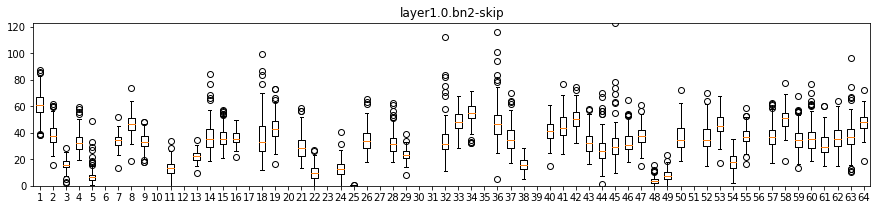

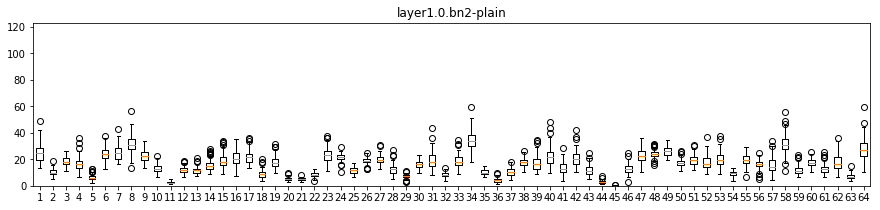

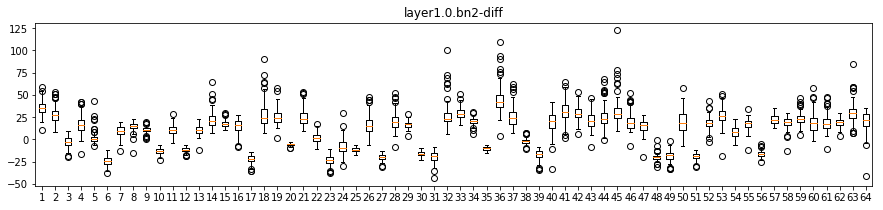

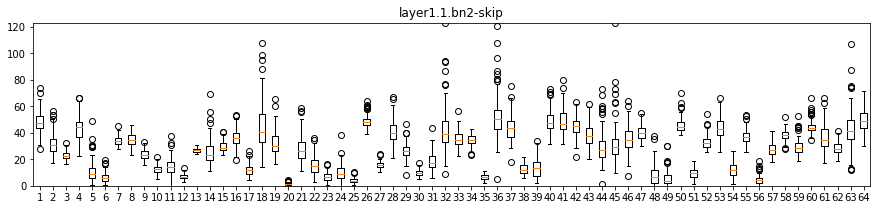

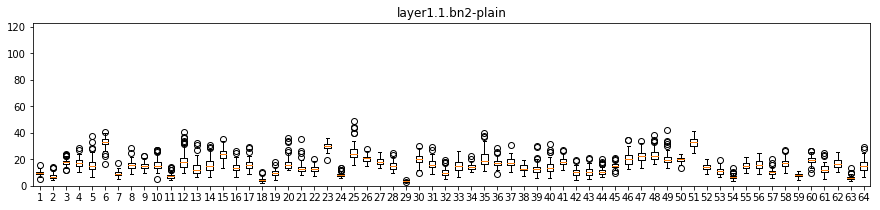

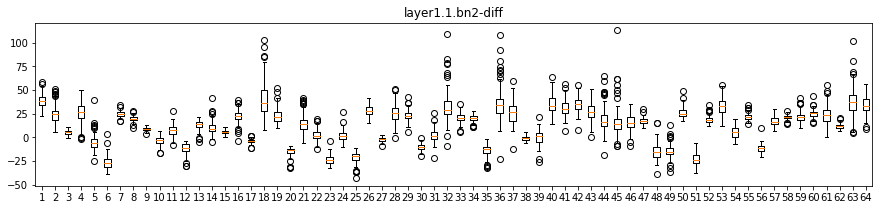

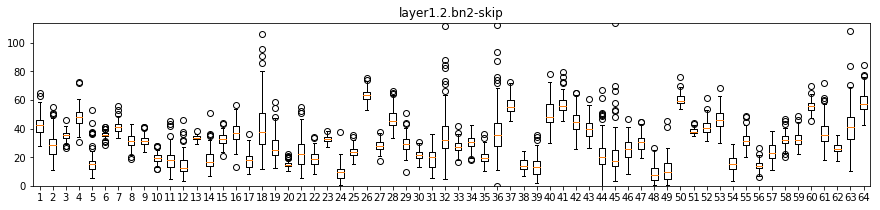

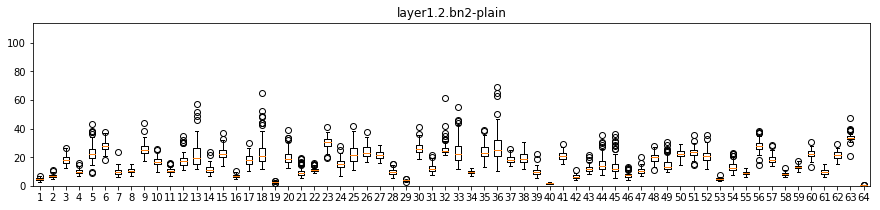

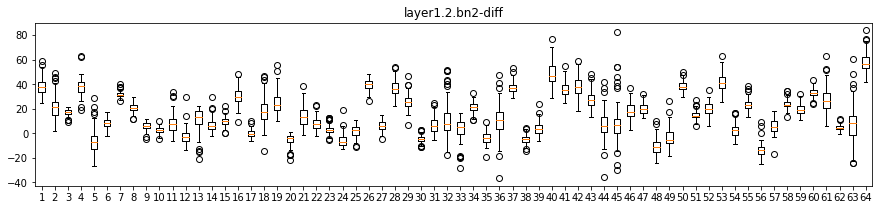

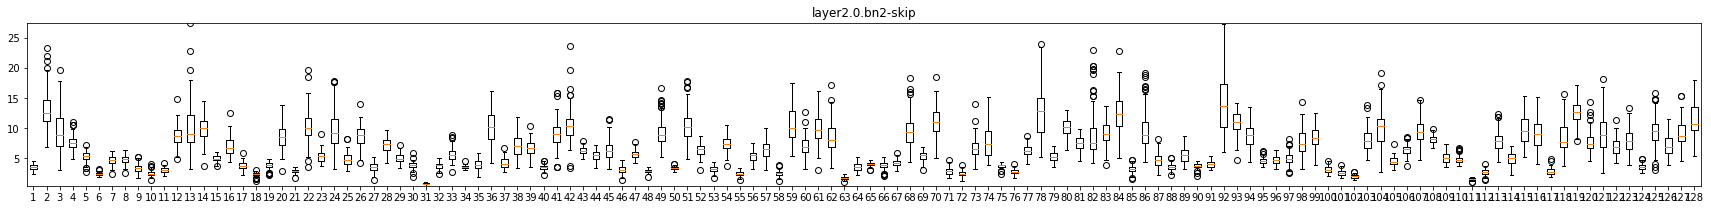

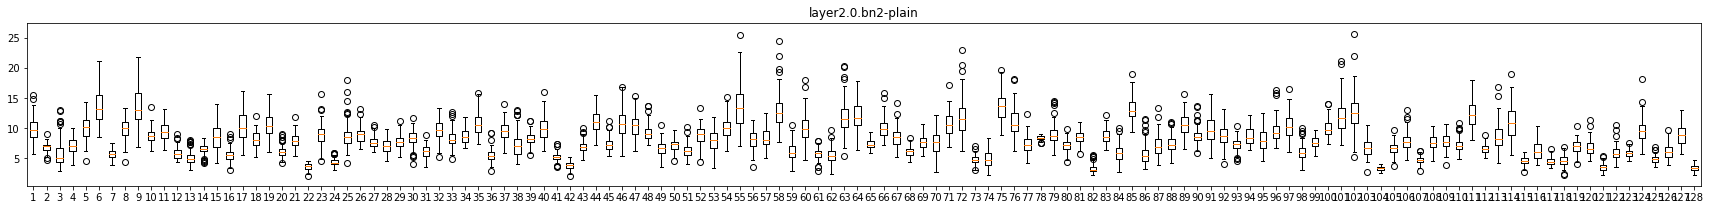

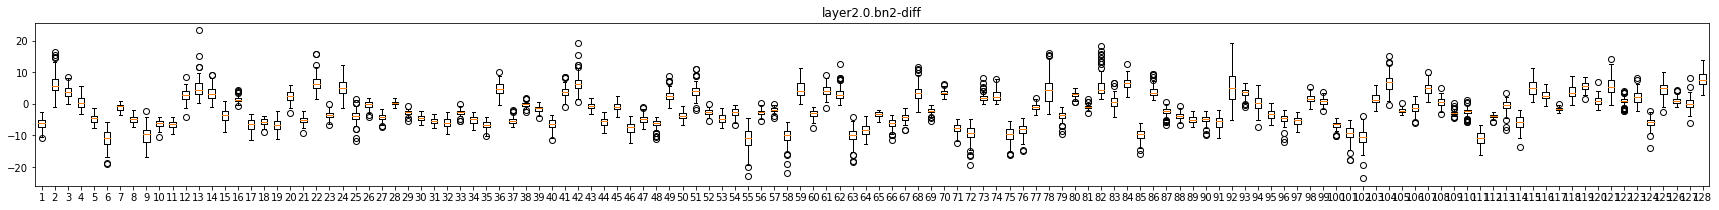

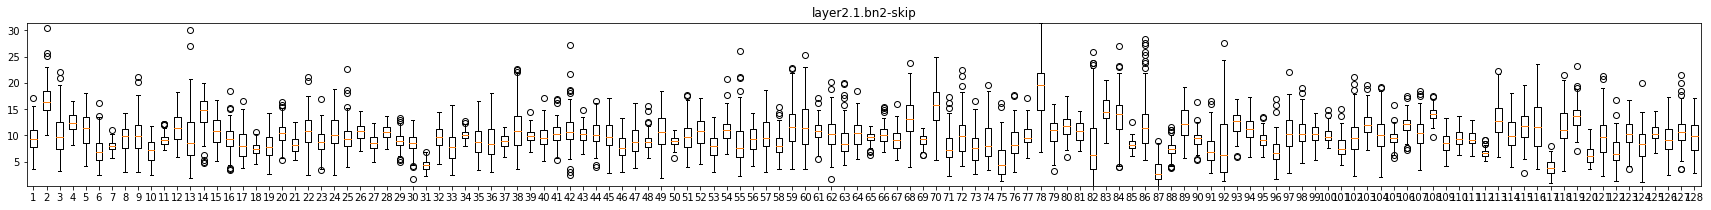

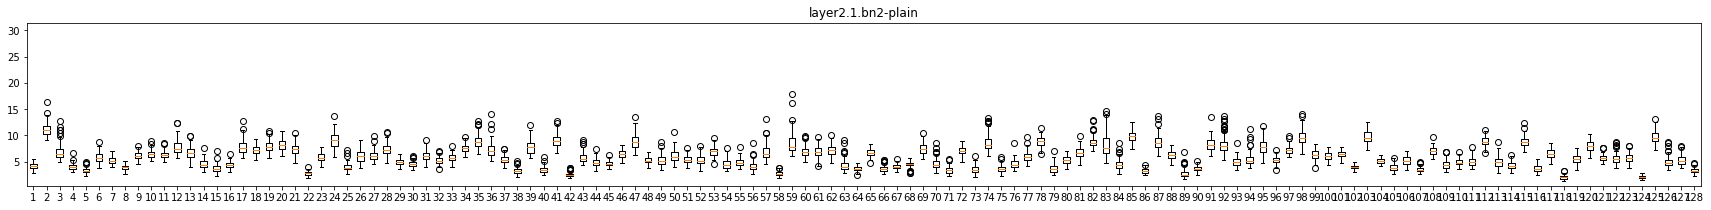

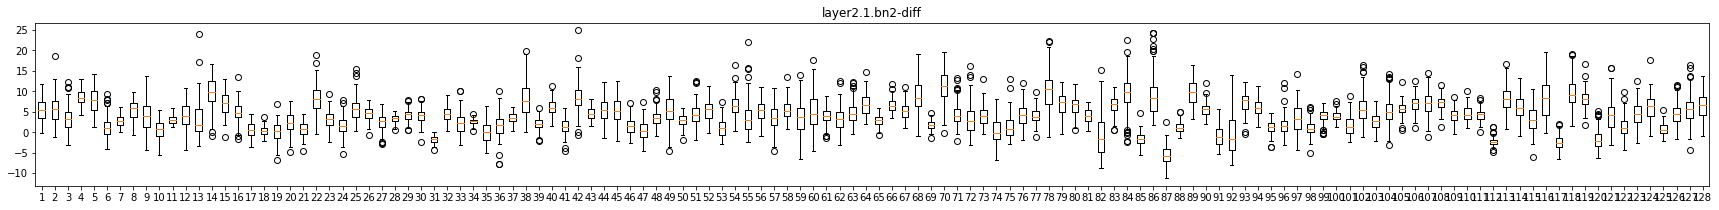

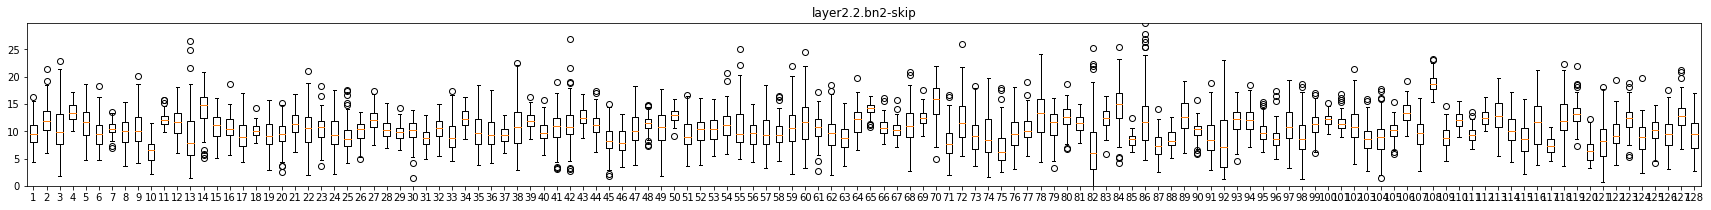

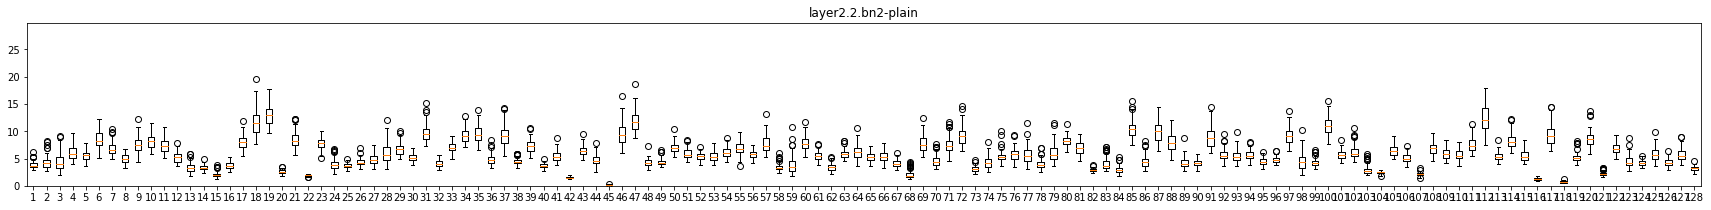

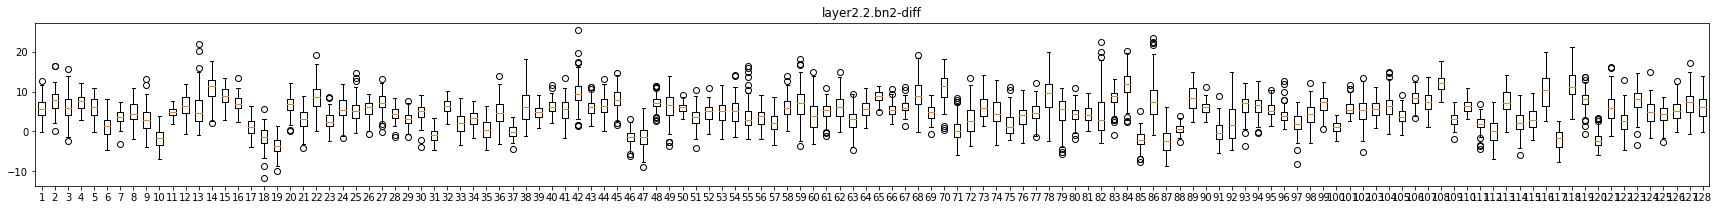

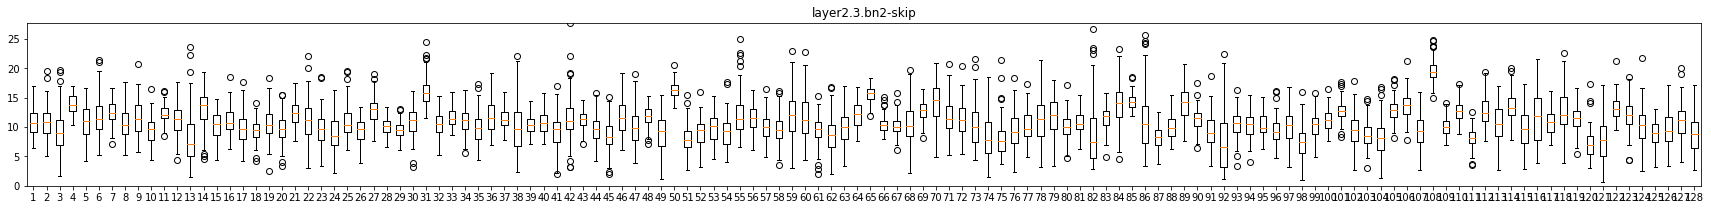

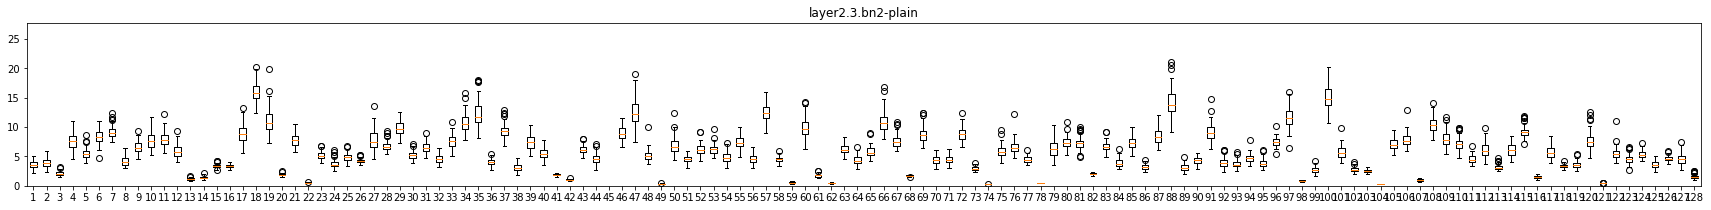

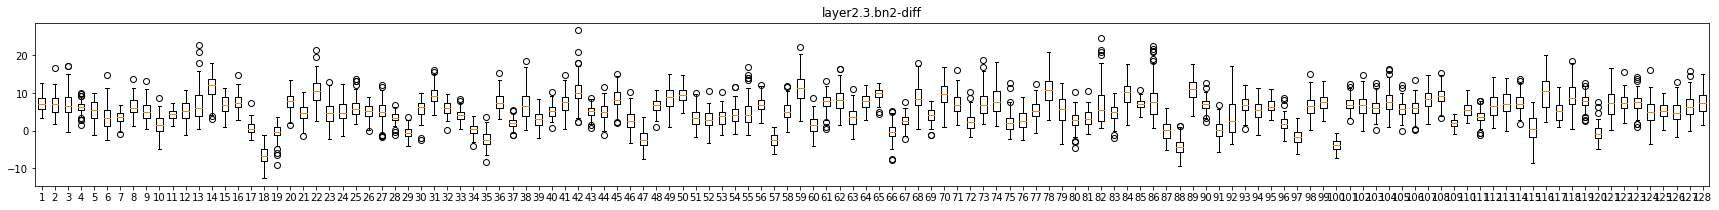

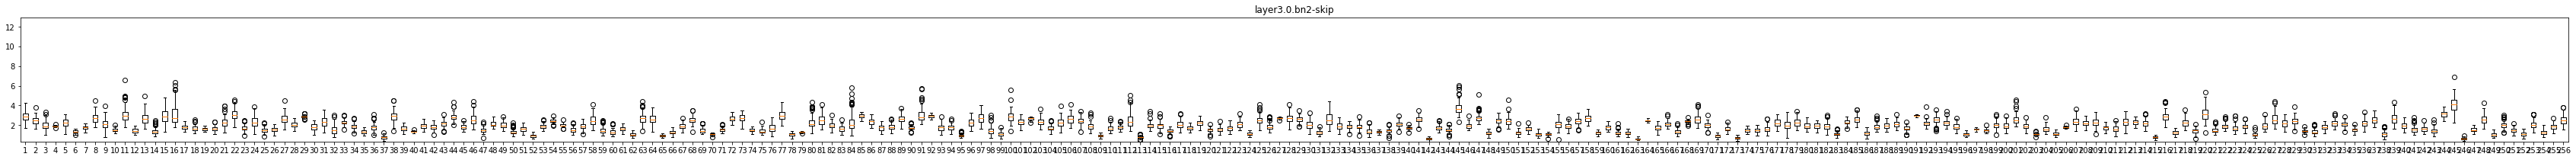

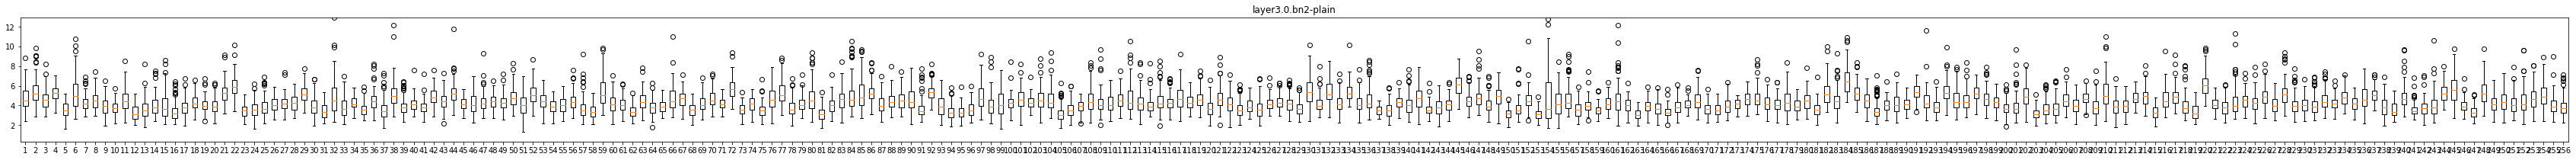

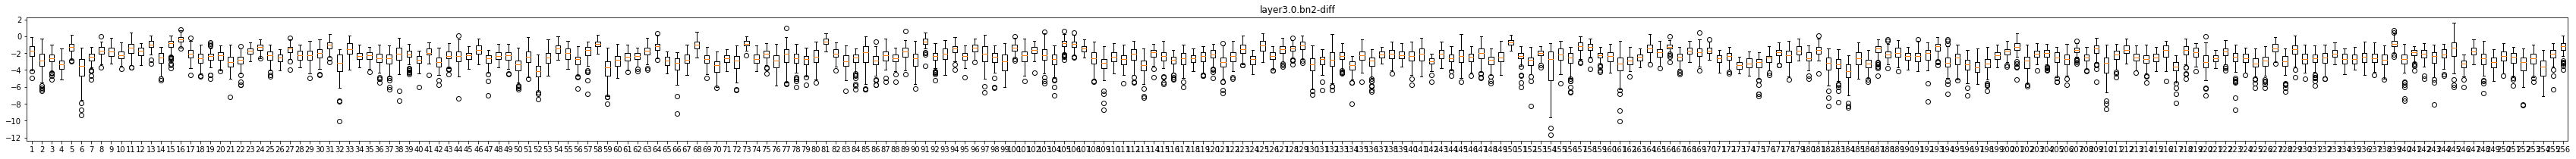

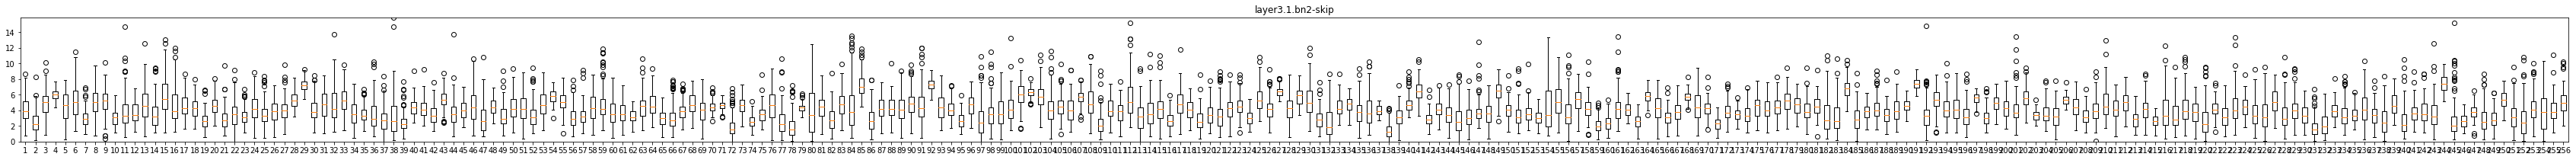

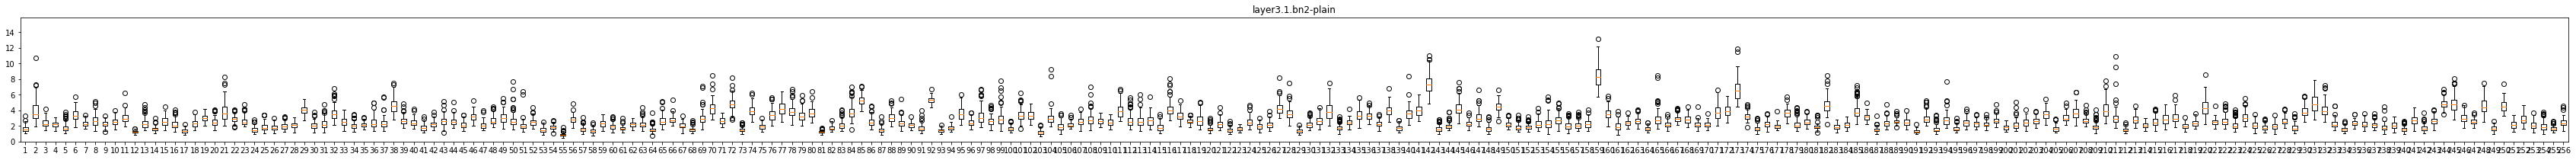

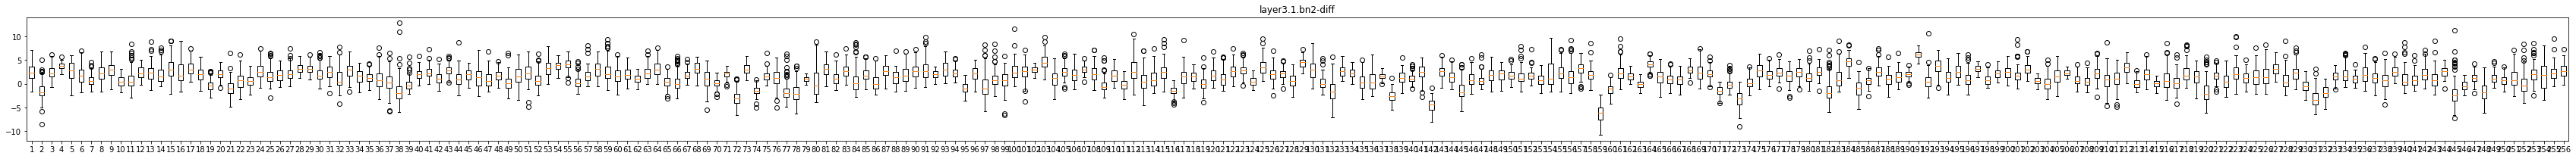

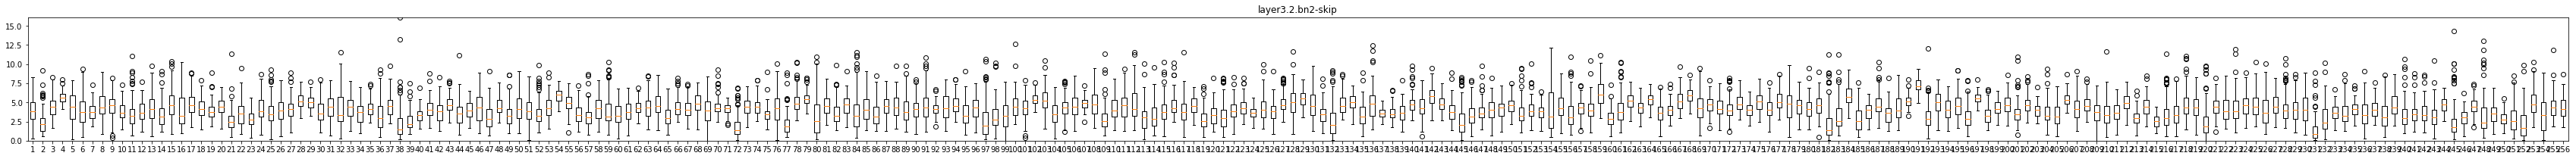

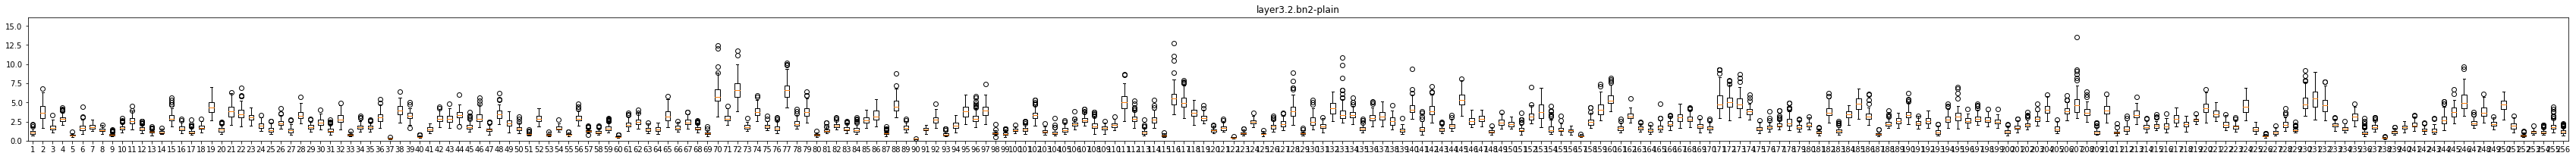

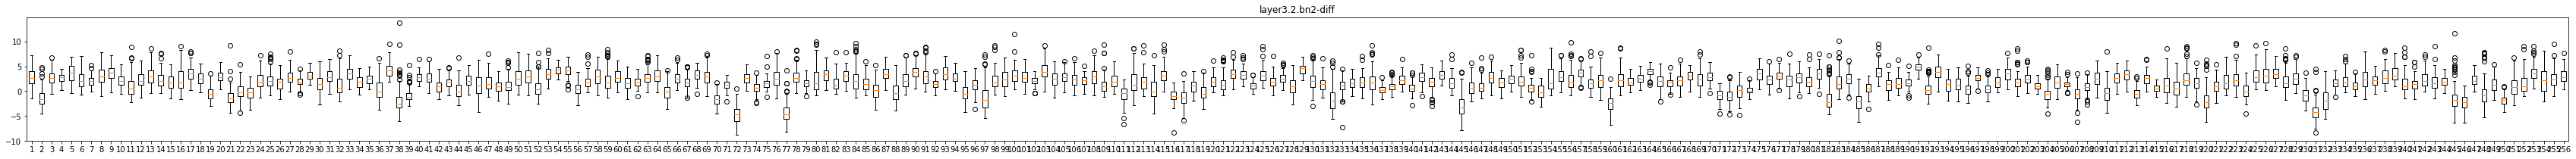

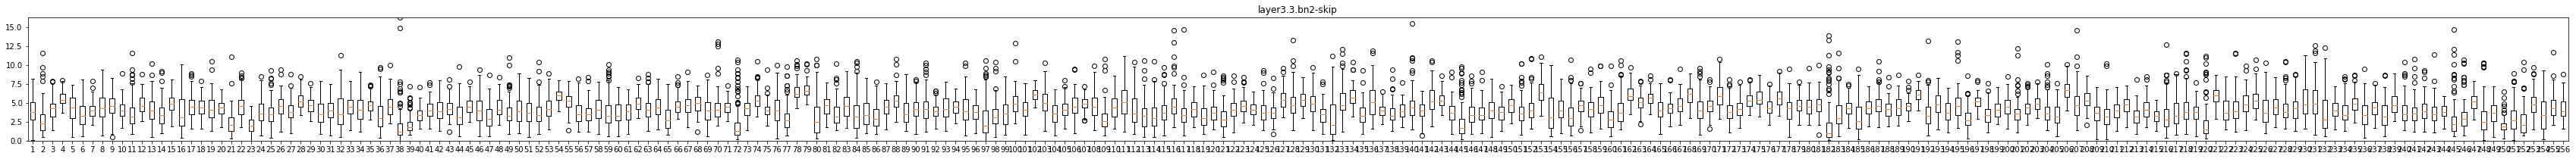

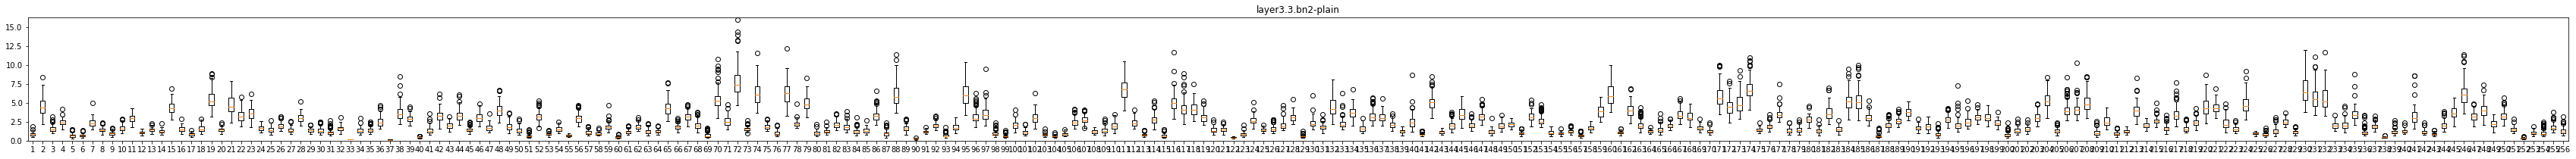

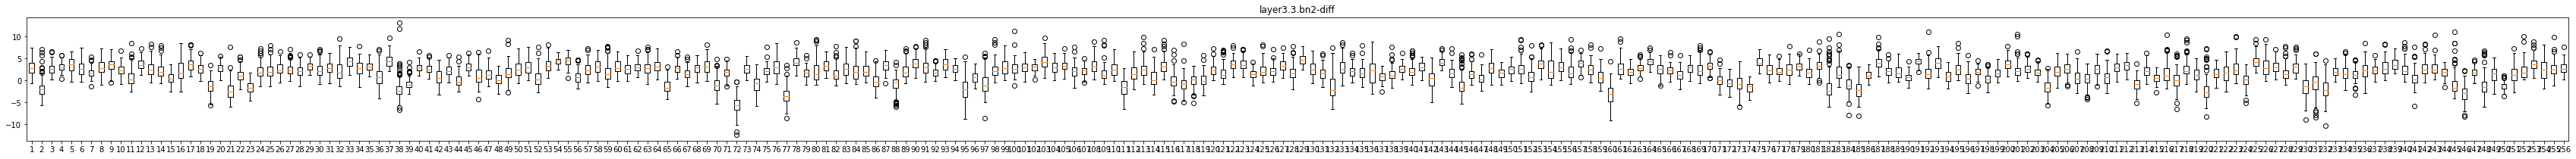

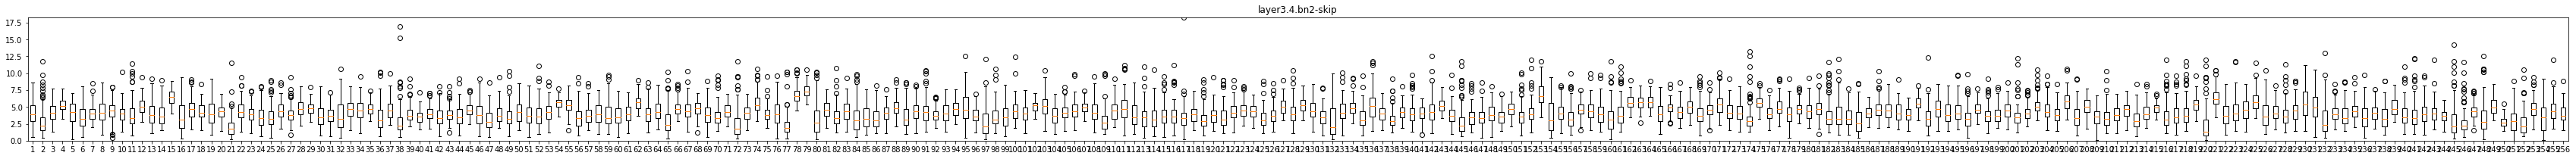

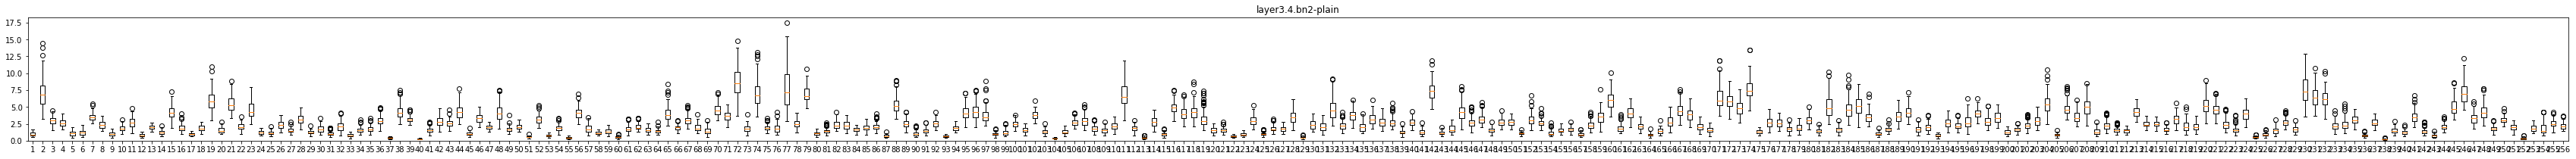

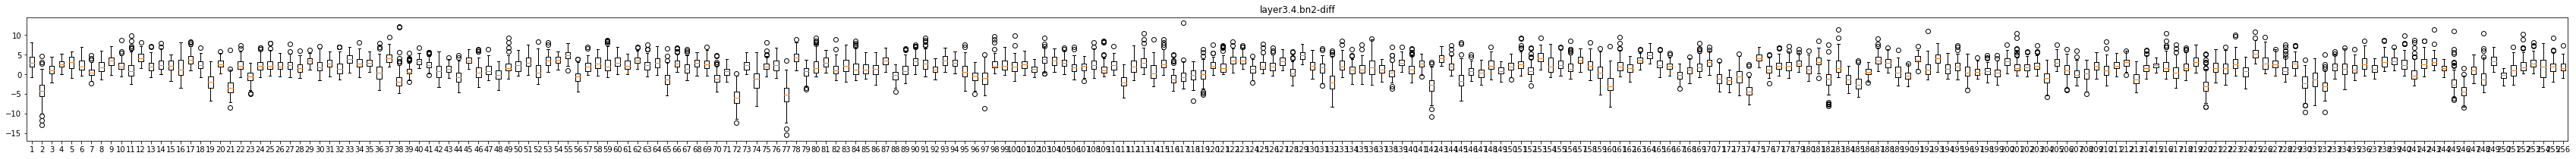

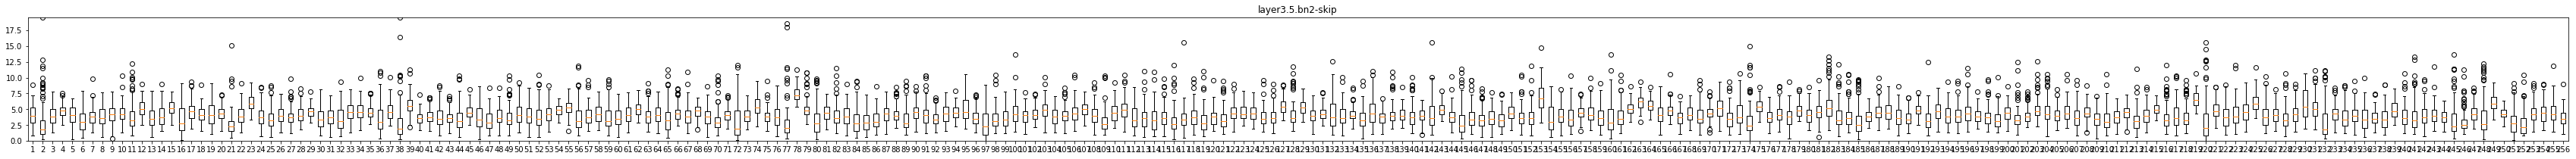

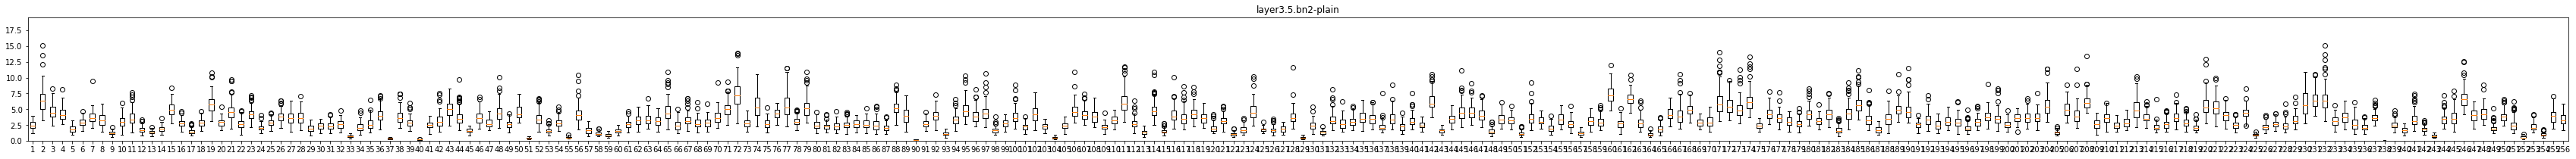

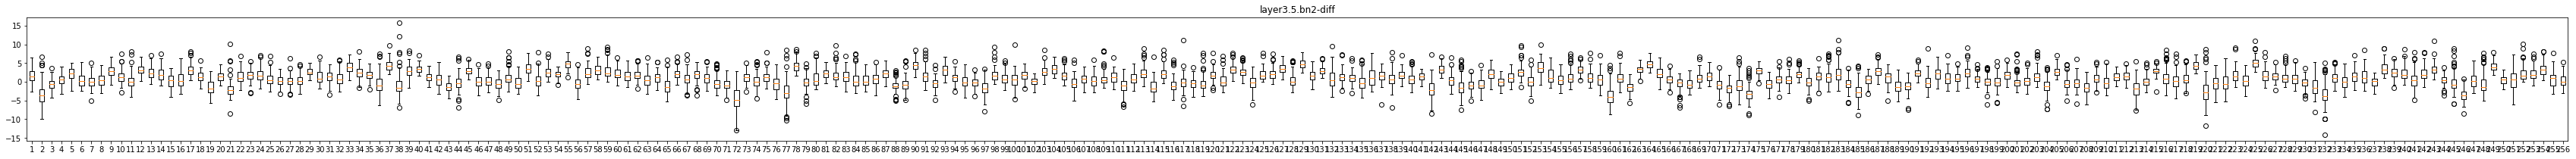

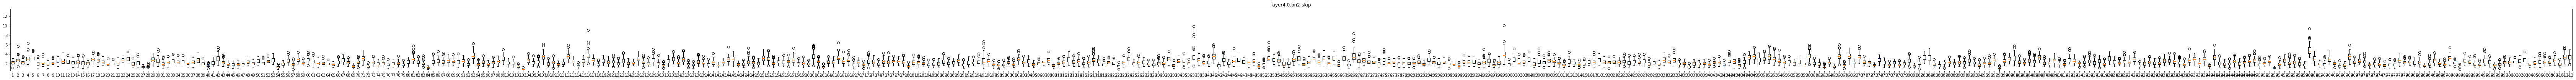

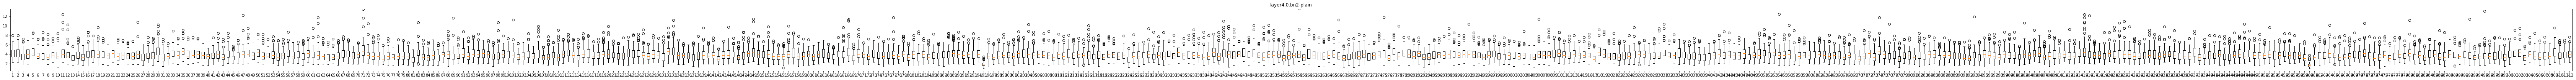

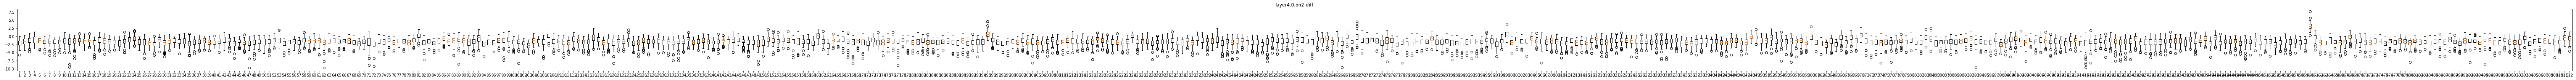

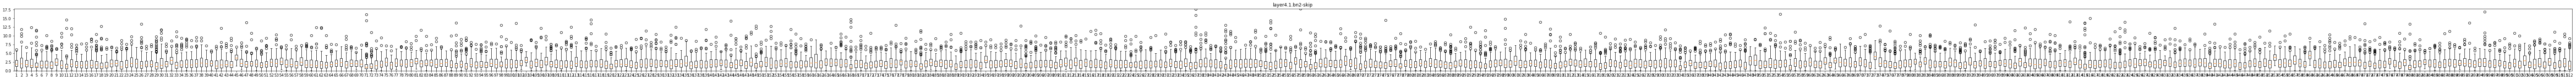

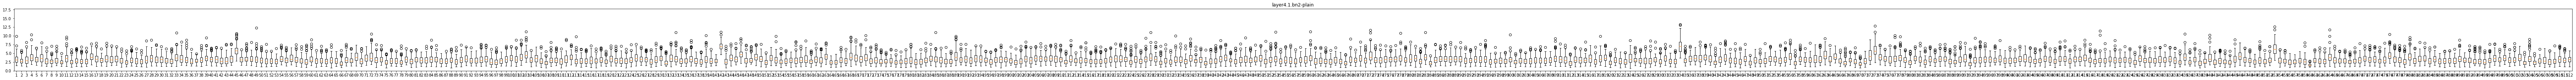

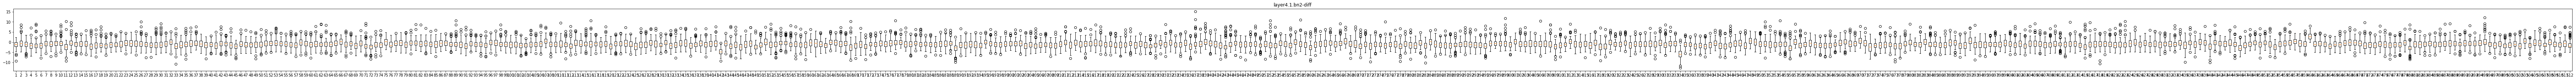

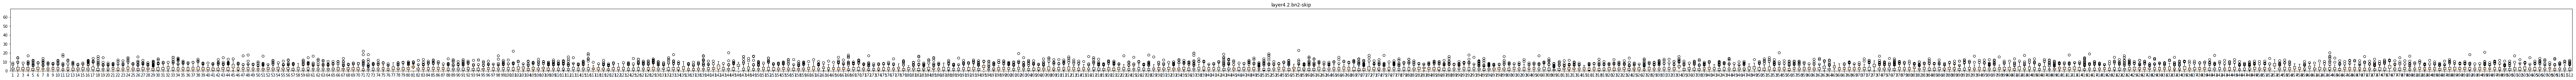

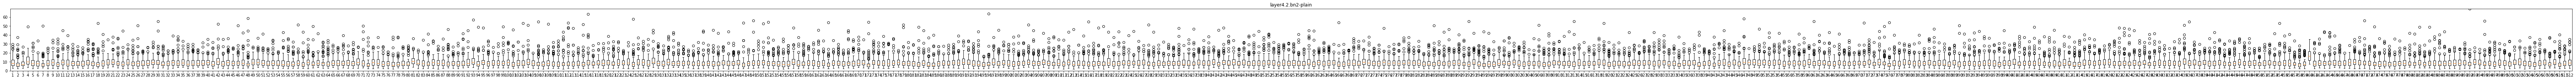

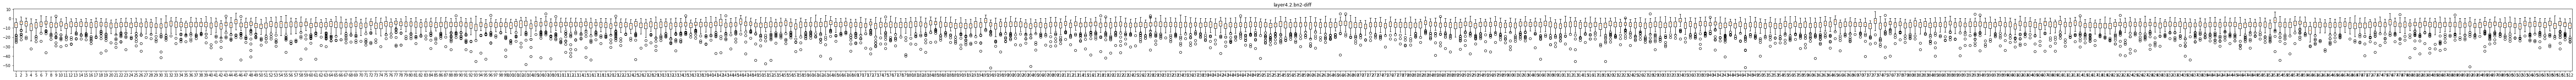

In [21]:

org_figsize = (15, 3)
def helper_boxplot(x, vrange=None, title=None, figsize=figsize):
    plt.figure(figsize=figsize)
    plt.boxplot(x)
    if title is not None:
        plt.title(title)
    if vrange is not None:
        plt.ylim(vrange[0], vrange[1])
    plt.show()

for key, value in datas.items():
    skip_norm, plain_norm = value
    
    skip_vmax = skip_norm.max().item()
    skip_vmin = skip_norm.min().item()
    plain_vmax = plain_norm.max().item()
    plain_vmin = plain_norm.min().item()
    vmax = skip_vmax if skip_vmax > plain_vmax else plain_vmax
    vmin = skip_vmin if skip_vmin < plain_vmin else plain_vmin
    figsize = (org_figsize[0] * skip_norm.shape[1] // 64, org_figsize[1])
    data = skip_norm.numpy()
    title = "{}-skip".format(key)
    helper_boxplot(data, vrange=(vmin, vmax), title=title, figsize=figsize)
    
    data = plain_norm.numpy()
    title = "{}-plain".format(key)
    helper_boxplot(data, vrange=(vmin, vmax), title=title, figsize=figsize)
        
    data = (skip_norm - plain_norm).numpy()
    title = "{}-diff".format(key)
    helper_boxplot(data, title=title, figsize=figsize)


In [16]:
model.state_dict().keys()

odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.conv2.weight', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer1.1.bn2.running_mean', 'layer1.1.bn2.running_var', 'layer1.1.bn2.num_batches_tracked', 'layer1.2.conv1.weight', 'layer1.2.bn1.weight', 'layer1.2.bn1.bias', 'layer1.2.bn1.running_mean', 'layer1.2.bn1.running_var', 'layer1.2.bn1.num_batches_tracked', 'layer1.2.conv2.weight', 'layer1.2.bn2.weight', 'layer1.2.bn2.bias', '

In [17]:
for key in plain_target_layer:
    key_w = "{}.weight".format(key)
    key_b = "{}.bias".format(key)
    bn_weight = model.state_dict()[key_w]
    bn_bias = model.state_dict()[key_b]
    print(bn_weight.shape, bn_bias.shape)

torch.Size([64]) torch.Size([64])
torch.Size([64]) torch.Size([64])
torch.Size([64]) torch.Size([64])
torch.Size([128]) torch.Size([128])
torch.Size([128]) torch.Size([128])
torch.Size([128]) torch.Size([128])
torch.Size([128]) torch.Size([128])
torch.Size([256]) torch.Size([256])
torch.Size([256]) torch.Size([256])
torch.Size([256]) torch.Size([256])
torch.Size([256]) torch.Size([256])
torch.Size([256]) torch.Size([256])
torch.Size([256]) torch.Size([256])
torch.Size([512]) torch.Size([512])
torch.Size([512]) torch.Size([512])
torch.Size([512]) torch.Size([512])


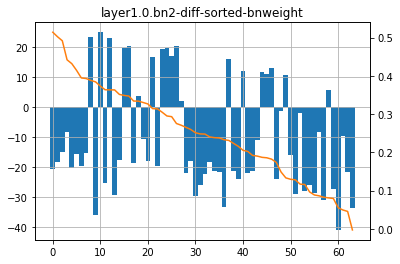

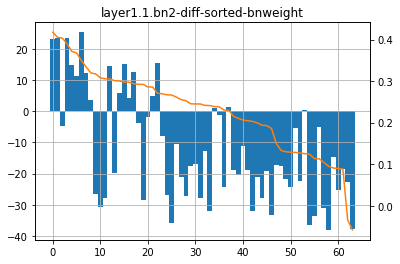

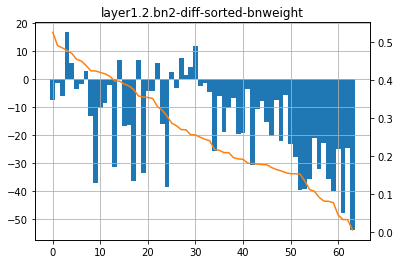

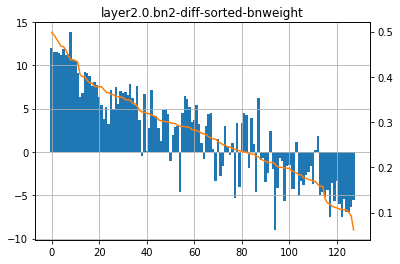

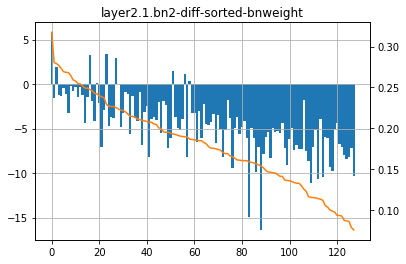

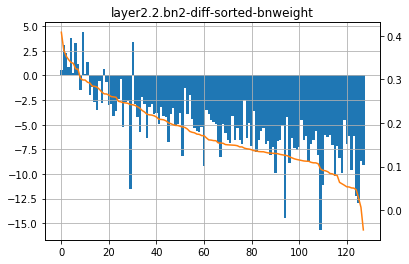

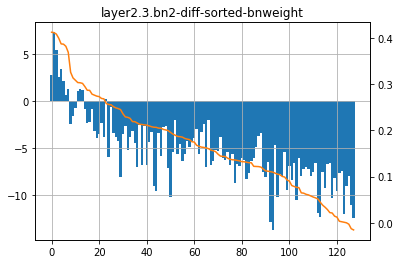

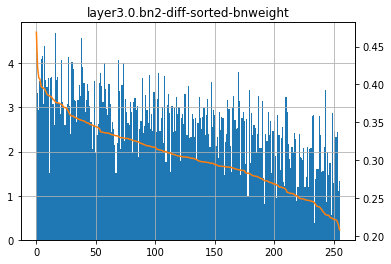

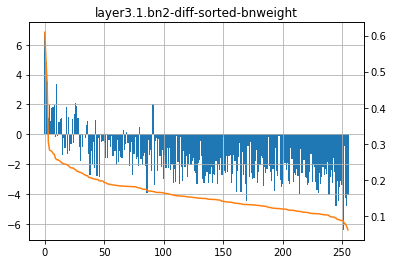

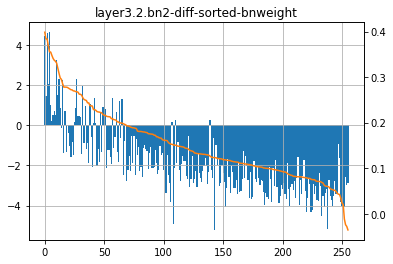

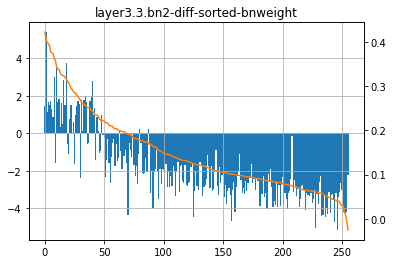

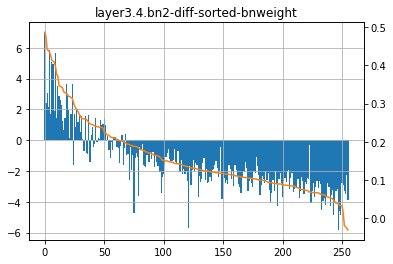

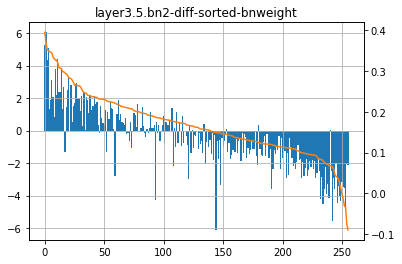

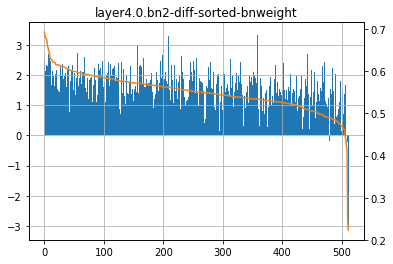

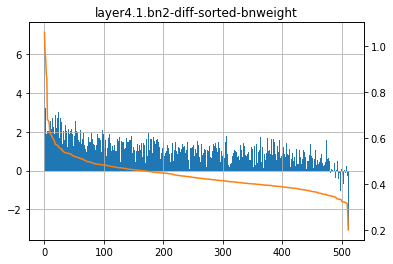

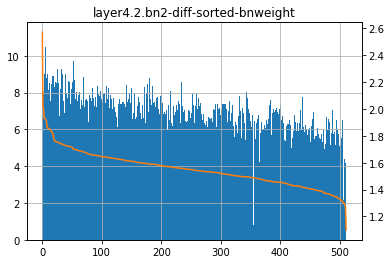

In [36]:
org_figsize = (10, 5)
    
for key, value in datas.items():
    key_w = "{}.weight".format(key)
    key_b = "{}.bias".format(key)
    bn_weight = model.state_dict()[key_w].numpy()
    bn_bias = model.state_dict()[key_b].numpy()
    
    skip_norm, plain_norm = value

    figsize = (org_figsize[0] * skip_norm.shape[1] // 64, org_figsize[1])    
    data = (plain_norm - skip_norm).mean(0).numpy()


    title = "{}-diff-sorted-bnweight".format(key)
    sorted_index = np.argsort(bn_weight)[::-1]
    color = "tab:blue"
    y = bn_weight[sorted_index]
    color = "tab:red"
    
    helper_twinx(data[sorted_index], y, title)

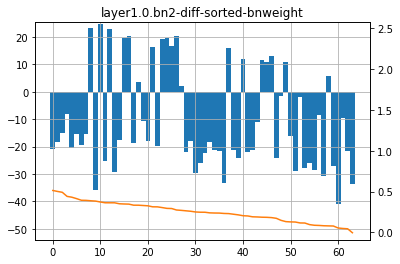

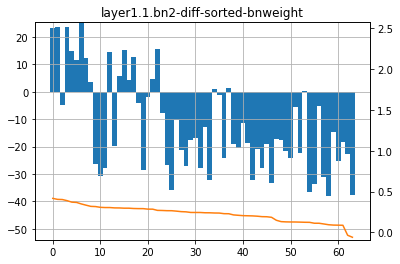

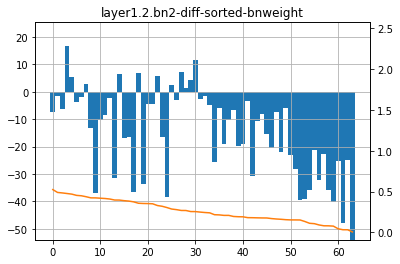

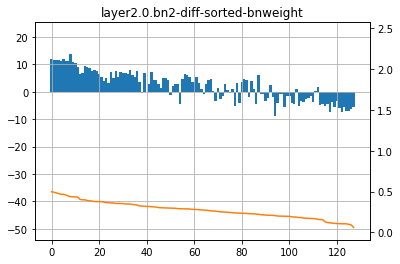

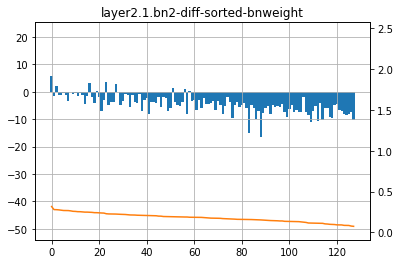

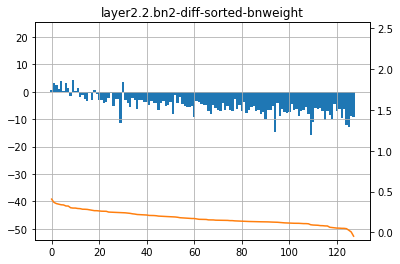

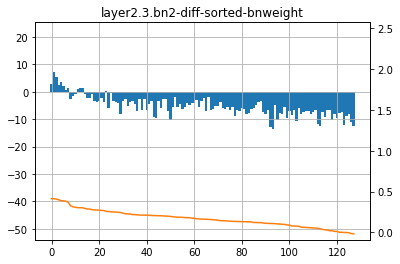

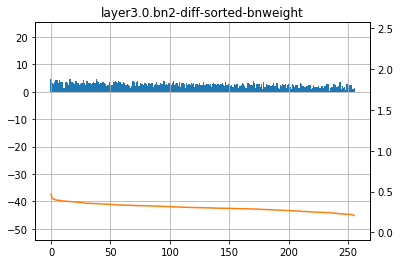

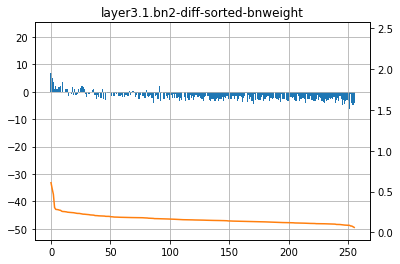

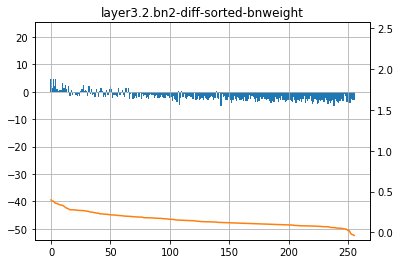

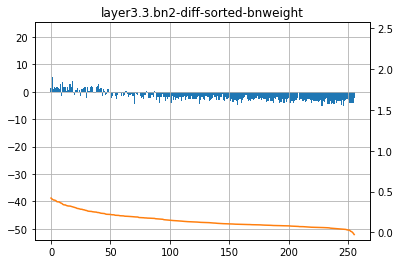

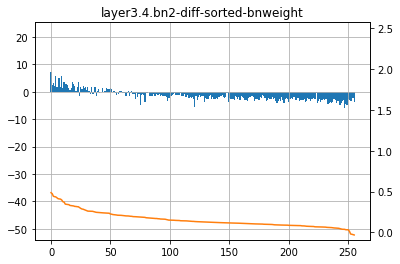

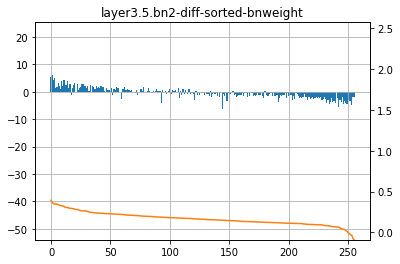

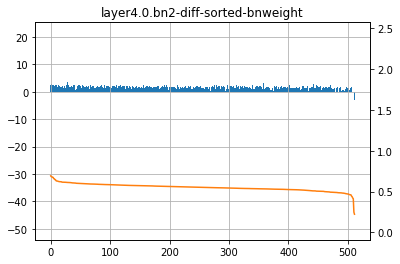

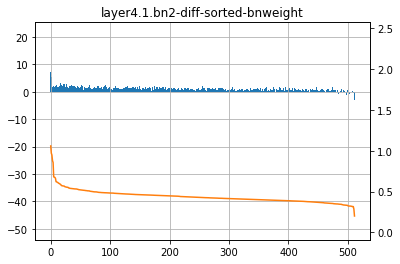

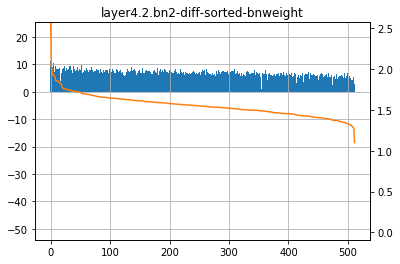

In [35]:
org_figsize = (10, 5)
def helper_bar_plot(y, vrange=None, title=None, figsize=(10, 5), show=True, color="tab:blue"):
    x = np.arange(len(y))
    if figsize is not None:
        plt.figure(figsize=figsize)
    
    plt.bar(x, y, width=1.0, color=color)
    if title is not None:
        plt.title(title)
    if vrange is not None:
        plt.ylim(vrange[0], vrange[1])
    if show:
        plt.show()

def helper_plot(y, vrange=None, title=None, figsize=(10, 5), show=True, color="tab:blue"):
    x = np.arange(len(y))
    if figsize is not None:
        plt.figure(figsize=figsize)
    
    plt.plot(x, y, color=color)
    if title is not None:
        plt.title(title)
    if vrange is not None:
        plt.ylim(vrange[0], vrange[1])
    if show:
        plt.show()
    
def helper_twinx(y1, y2, title, vrange1=None, vrange2=None):
    x = np.arange(len(y1))
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ln1 = ax1.bar(x, y1, width=1.0, label="bar")

    ax2 = ax1.twinx()
    ln2 = ax2.plot(x, y2,'C1', label="plot")
    
    if vrange1:
        ax1.set_ylim(vrange1[0], vrange1[1])
    if vrange2:
        ax2.set_ylim(vrange2[0], vrange2[1])

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
#     ax1.legend(h1+h2, l1+l2, loc='lower right')

#     ax1.set_xlabel('t')
#     ax1.set_ylabel(r'$y=sin(2\pi fst)$')
    ax1.grid(True)
#     ax2.set_ylabel(r'$y=at+b$')
    plt.title(title)
    plt.show()

vmax = -np.inf
vmin = np.inf
bn_weight_max = -np.inf
bn_weight_min = np.inf

for key, value in datas.items():
    skip_norm, plain_norm = value
    data = (plain_norm - skip_norm).mean(0).numpy()
    if data.max() > vmax:
        vmax = data.max()
    if data.min() < vmin:
        vmin = data.min()
        
#     vmax = skip_vmax if skip_vmax > plain_vmax else plain_vmax
#     vmin = skip_vmin if skip_vmin < plain_vmin else plain_vmin
    key_w = "{}.weight".format(key)
    bn_weight = model.state_dict()[key_w].numpy()
    if bn_weight.max() > bn_weight_max:
        bn_weight_max = bn_weight.max()
    if bn_weight.min() < bn_weight_min:
        bn_weight_min = bn_weight.min()
    
    
for key, value in datas.items():
    key_w = "{}.weight".format(key)
    key_b = "{}.bias".format(key)
    bn_weight = model.state_dict()[key_w].numpy()
    bn_bias = model.state_dict()[key_b].numpy()
    
    skip_norm, plain_norm = value
    
#     skip_vmax = skip_norm.max().item()
#     skip_vmin = skip_norm.min().item()
#     plain_vmax = plain_norm.max().item()
#     plain_vmin = plain_norm.min().item()
#     vmax = skip_vmax if skip_vmax > plain_vmax else plain_vmax
#     vmin = skip_vmin if skip_vmin < plain_vmin else plain_vmin

    figsize = (org_figsize[0] * skip_norm.shape[1] // 64, org_figsize[1])    
    data = (plain_norm - skip_norm).mean(0).numpy()

#     title = "{}-diff".format(key)
#     helper_bar_plot(data, title=title, figsize=figsize)

    title = "{}-diff-sorted-bnweight".format(key)
    sorted_index = np.argsort(bn_weight)[::-1]
    color = "tab:blue"
#     helper_bar_plot(data[sorted_index], title=title, figsize=figsize, color=color, show=False)
    y = bn_weight[sorted_index]
    color = "tab:red"
#     helper_plot(y, color=color, figsize=None)
    
    helper_twinx(data[sorted_index], y, title, vrange1=(vmin, vmax), vrange2=(bn_weight_min, bn_weight_max))
    
#     title = "{}-diff-sorted-bnbias".format(key)
#     sorted_index = np.argsort(bn_bias)[::-1]
#     helper_bar_plot(data[sorted_index], title=title, figsize=figsize)

In [37]:
datas.keys()

dict_keys(['layer1.0.bn2', 'layer1.1.bn2', 'layer1.2.bn2', 'layer2.0.bn2', 'layer2.1.bn2', 'layer2.2.bn2', 'layer2.3.bn2', 'layer3.0.bn2', 'layer3.1.bn2', 'layer3.2.bn2', 'layer3.3.bn2', 'layer3.4.bn2', 'layer3.5.bn2', 'layer4.0.bn2', 'layer4.1.bn2', 'layer4.2.bn2'])

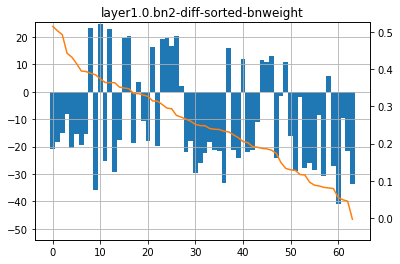

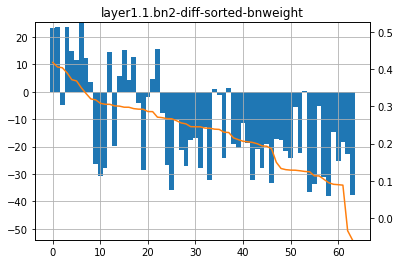

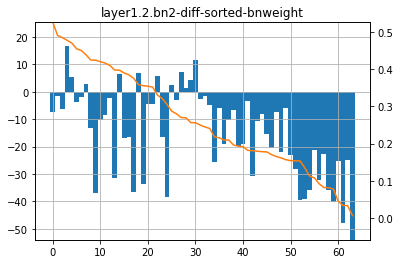

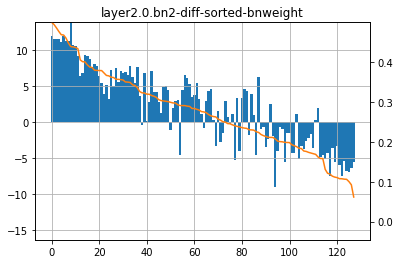

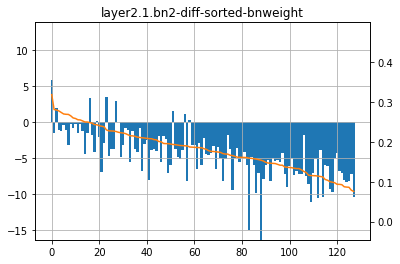

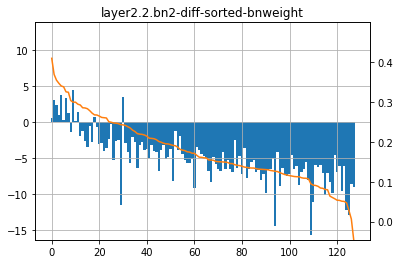

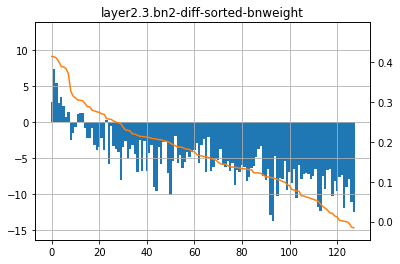

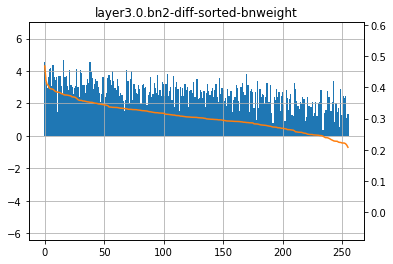

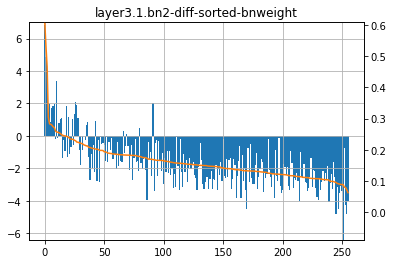

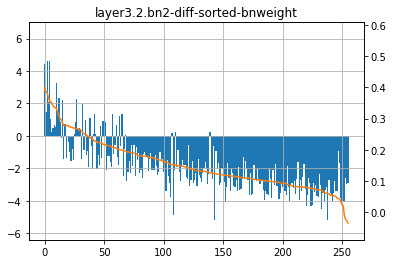

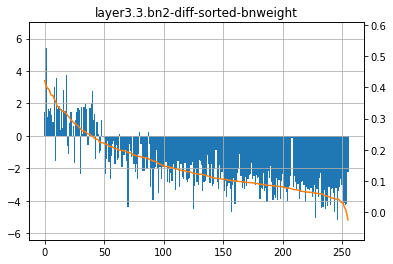

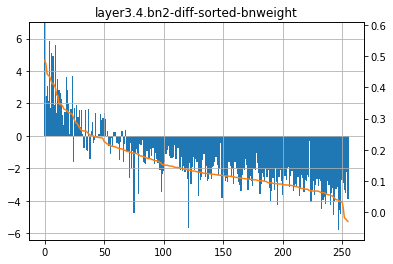

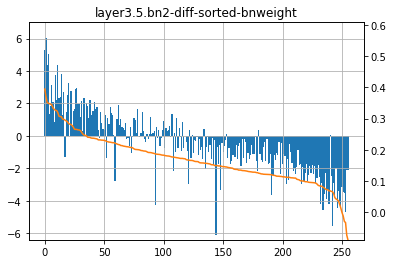

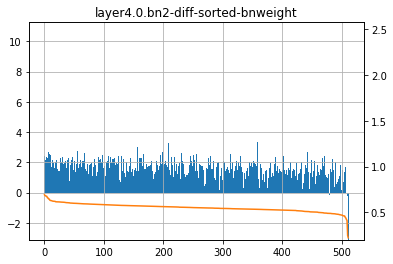

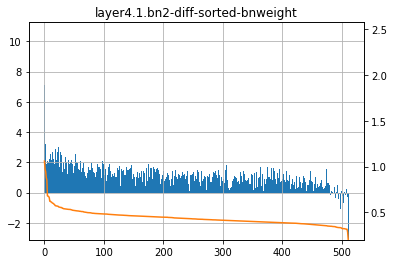

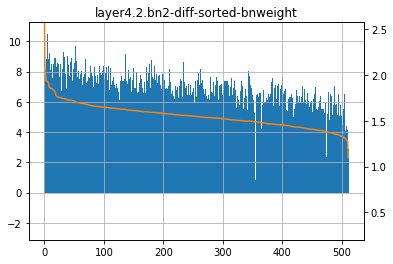

In [38]:
org_figsize = (10, 5)

keys = list(datas.keys())

for i in range(4):
    filter_key = "layer{}".format(i + 1)
    vmax = -np.inf
    vmin = np.inf
    bn_weight_max = -np.inf
    bn_weight_min = np.inf

    for key in filter(lambda x: filter_key in x, keys):
        value = datas[key]
        skip_norm, plain_norm = value
        data = (plain_norm - skip_norm).mean(0).numpy()
        if data.max() > vmax:
            vmax = data.max()
        if data.min() < vmin:
            vmin = data.min()

        key_w = "{}.weight".format(key)
        bn_weight = model.state_dict()[key_w].numpy()
        if bn_weight.max() > bn_weight_max:
            bn_weight_max = bn_weight.max()
        if bn_weight.min() < bn_weight_min:
            bn_weight_min = bn_weight.min()


    for key in filter(lambda x: filter_key in x, keys):
        value = datas[key]
        key_w = "{}.weight".format(key)
        key_b = "{}.bias".format(key)
        bn_weight = model.state_dict()[key_w].numpy()
        bn_bias = model.state_dict()[key_b].numpy()

        skip_norm, plain_norm = value

        figsize = (org_figsize[0] * skip_norm.shape[1] // 64, org_figsize[1])    
        data = (plain_norm - skip_norm).mean(0).numpy()

        title = "{}-diff-sorted-bnweight".format(key)
        sorted_index = np.argsort(bn_weight)[::-1]
        color = "tab:blue"
        y = bn_weight[sorted_index]
        color = "tab:red"

        helper_twinx(data[sorted_index], y, title, vrange1=(vmin, vmax), vrange2=(bn_weight_min, bn_weight_max))


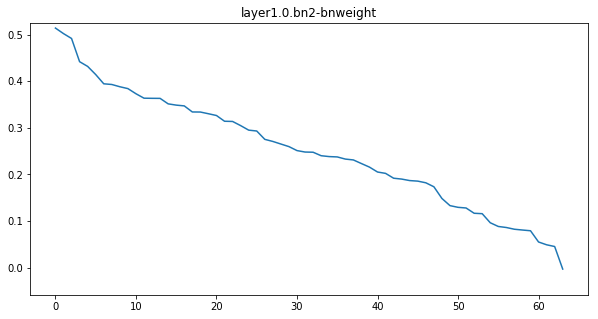

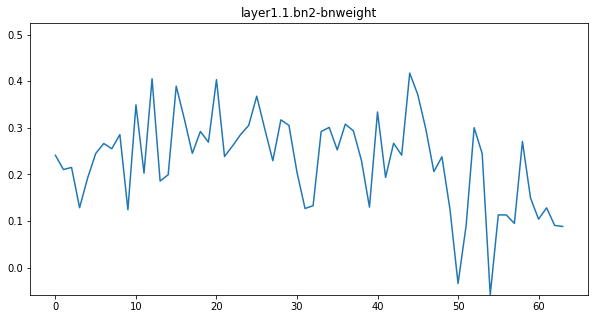

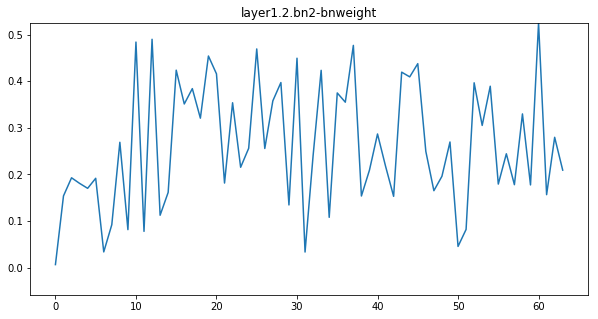

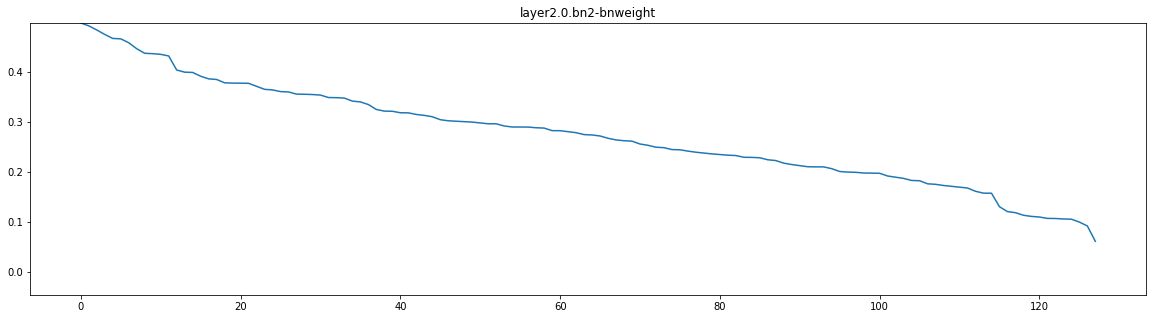

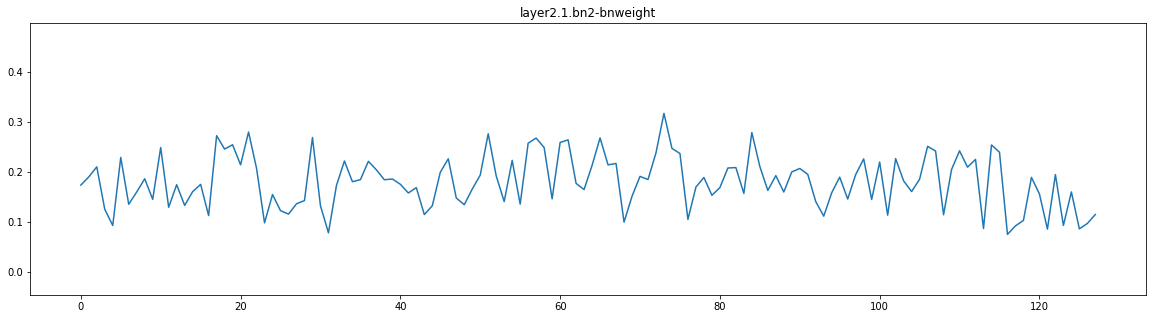

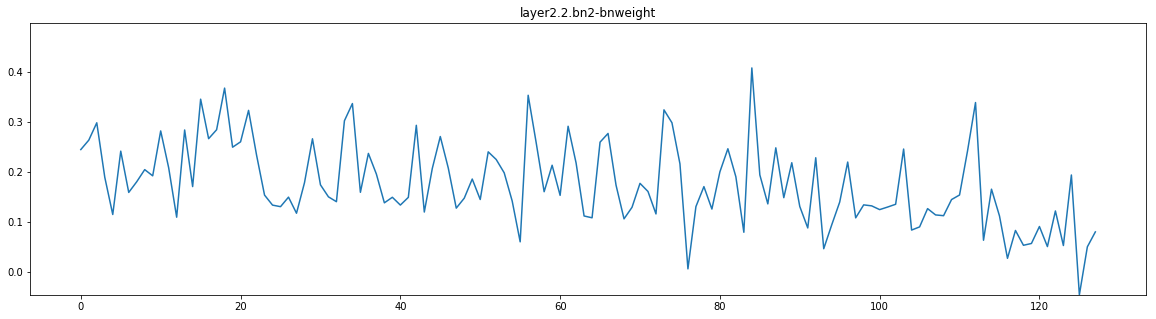

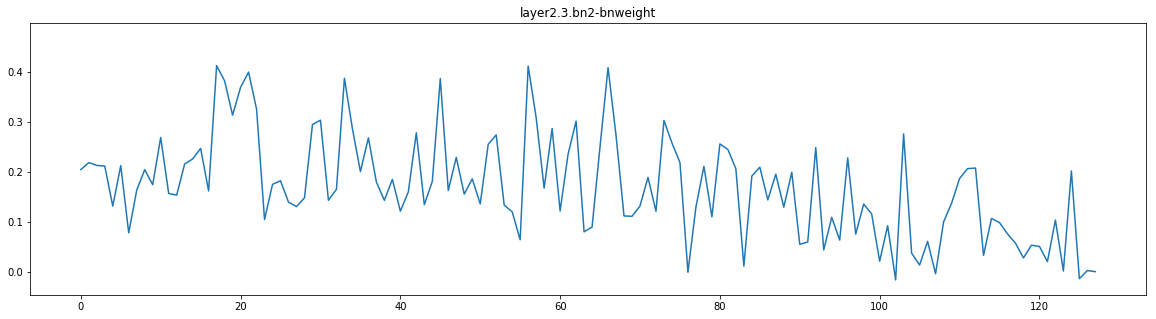

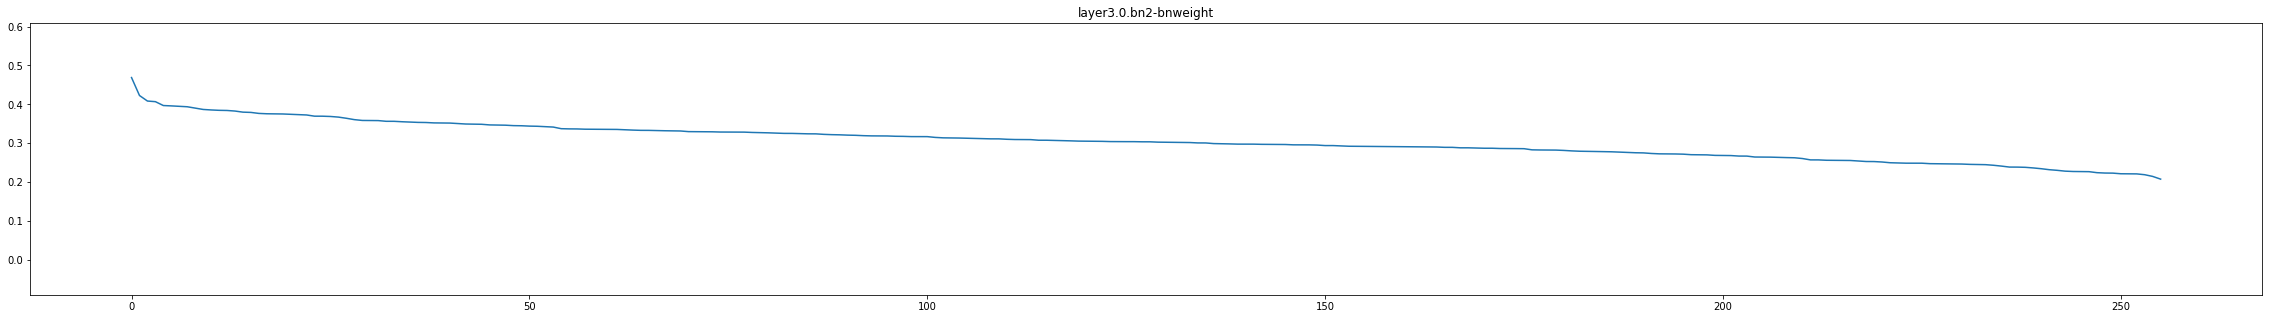

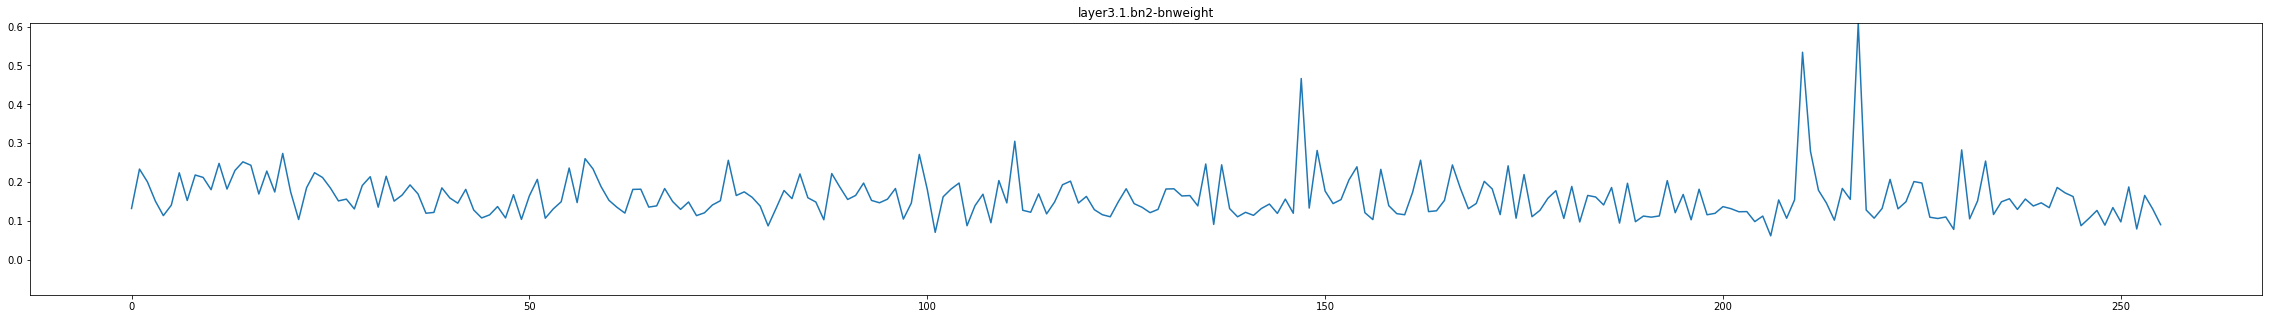

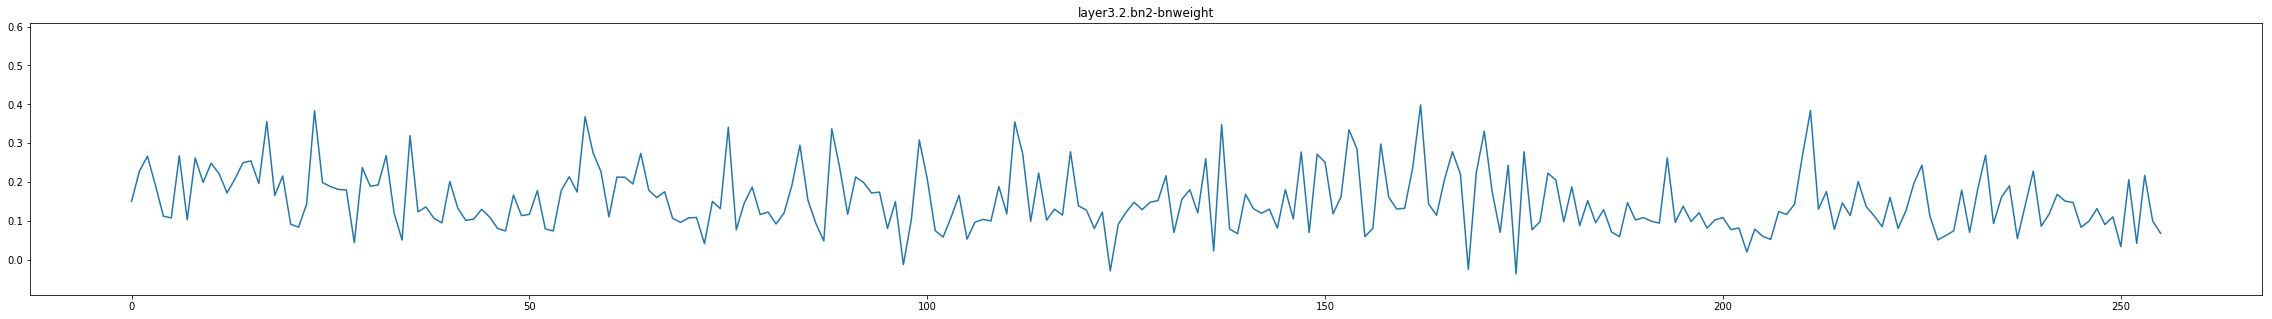

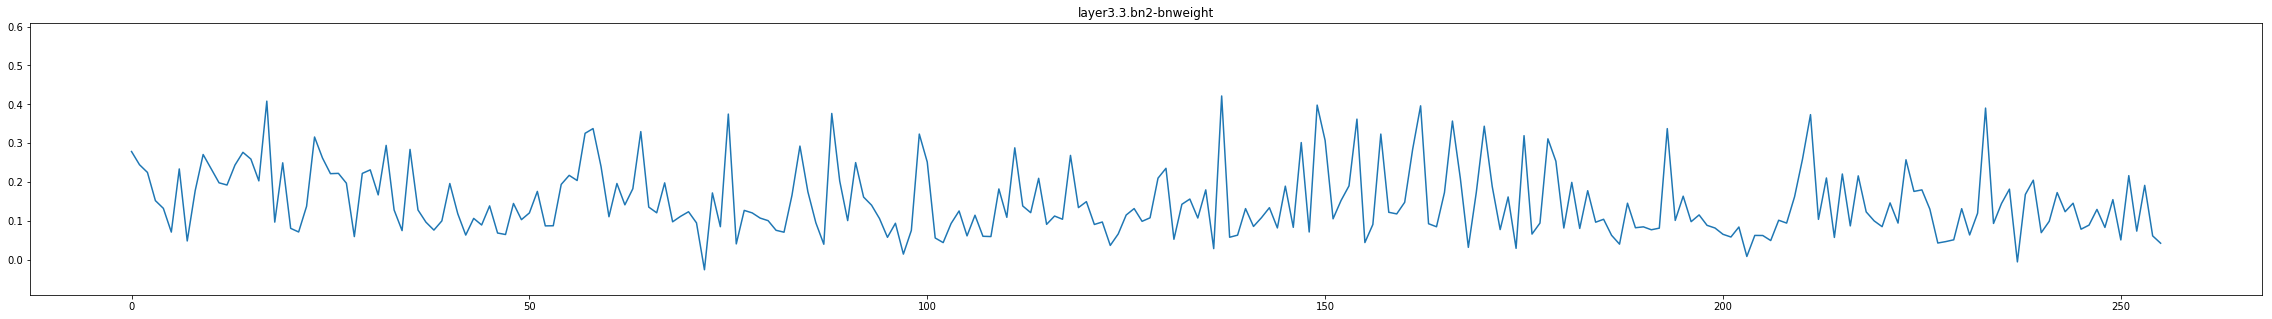

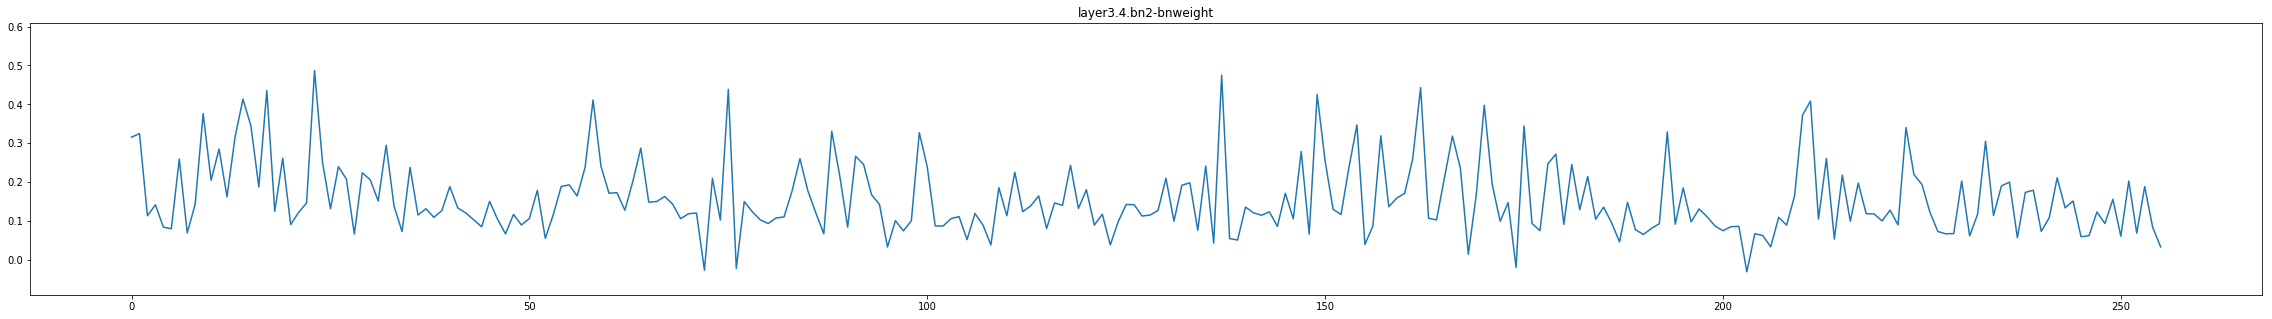

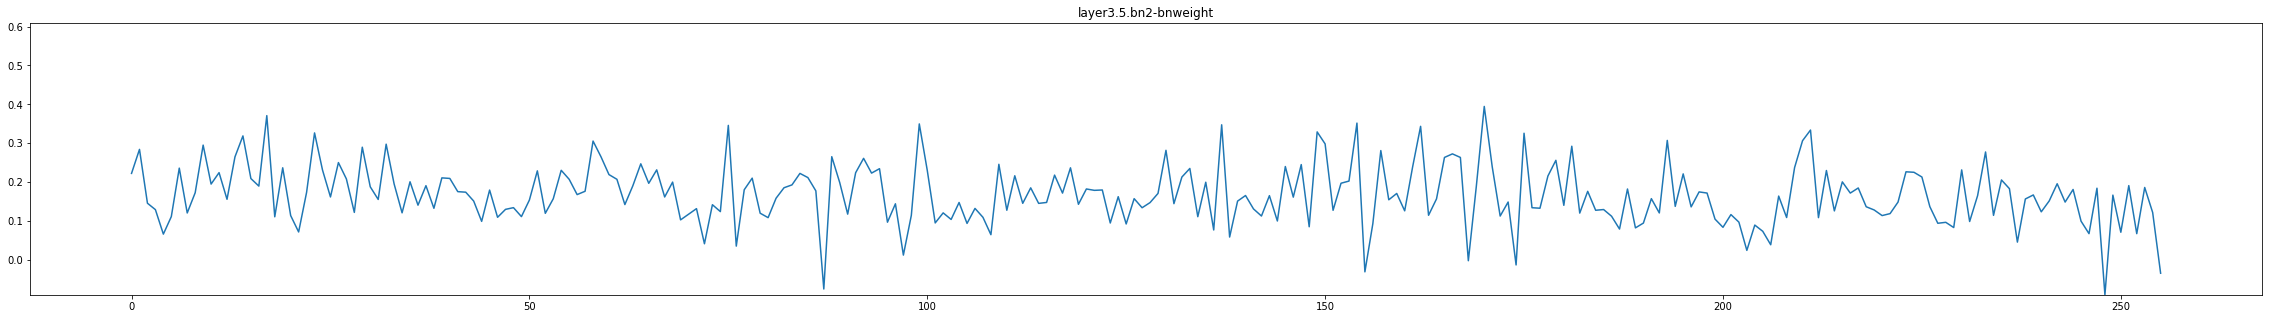

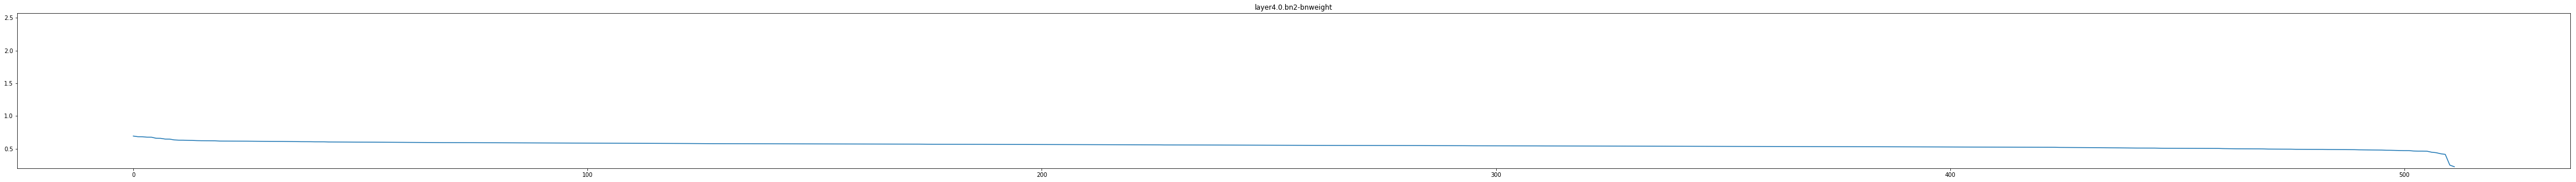

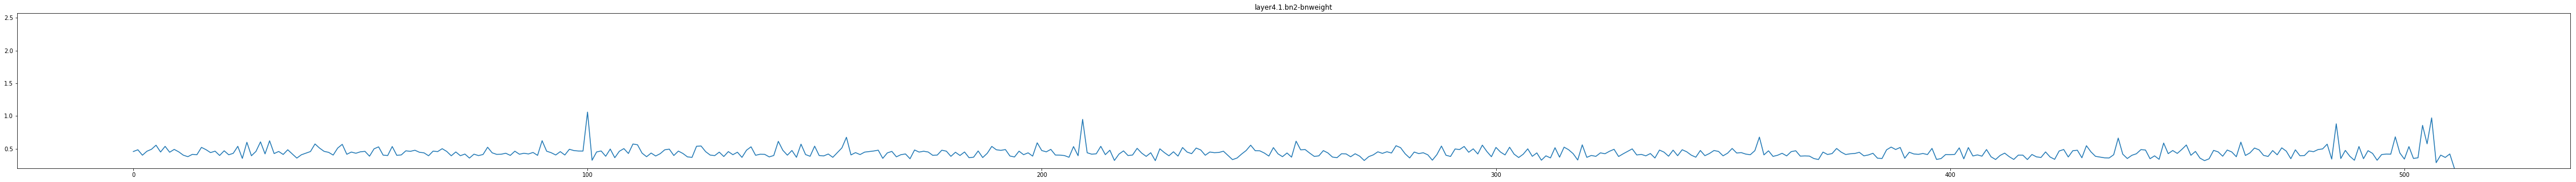

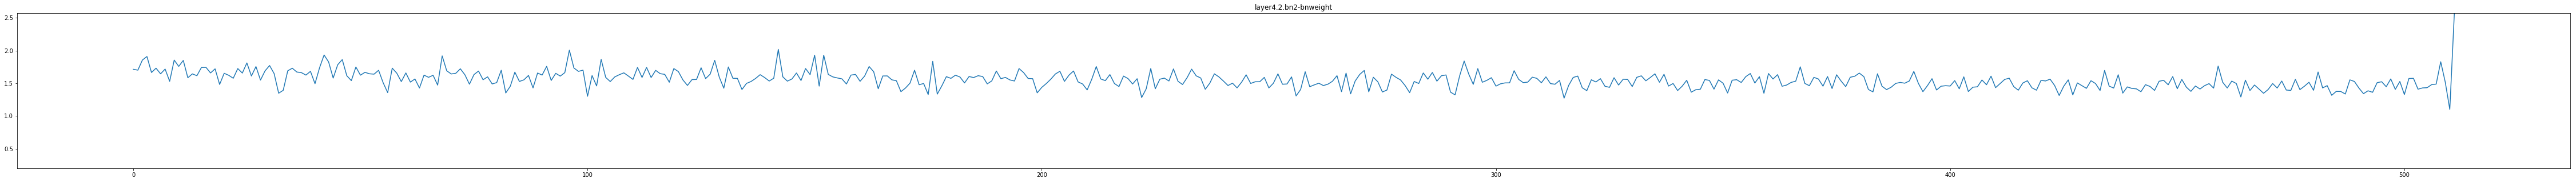

In [45]:
org_figsize = (10, 5)

keys = list(datas.keys())

for i in range(4):
    filter_key = "layer{}".format(i + 1)
    vmax = -np.inf
    vmin = np.inf
    bn_weight_max = -np.inf
    bn_weight_min = np.inf

    for key in filter(lambda x: filter_key in x, keys):
        value = datas[key]
        skip_norm, plain_norm = value
        data = (plain_norm - skip_norm).mean(0).numpy()
        if data.max() > vmax:
            vmax = data.max()
        if data.min() < vmin:
            vmin = data.min()

        key_w = "{}.weight".format(key)
        bn_weight = model.state_dict()[key_w].numpy()
        if bn_weight.max() > bn_weight_max:
            bn_weight_max = bn_weight.max()
        if bn_weight.min() < bn_weight_min:
            bn_weight_min = bn_weight.min()
            
    sorted_index = None
    figsize = org_figsize
    for key in filter(lambda x: filter_key in x, keys):
        value = datas[key]
        key_w = "{}.weight".format(key)
        key_b = "{}.bias".format(key)
        bn_weight = model.state_dict()[key_w].numpy()
        bn_bias = model.state_dict()[key_b].numpy()

        skip_norm, plain_norm = value

        figsize = (org_figsize[0] * skip_norm.shape[1] // 64, org_figsize[1])    
        data = (plain_norm - skip_norm).mean(0).numpy()

        title = "{}-bnweight".format(key)
        if sorted_index is None:
            sorted_index = np.argsort(bn_weight)[::-1]
        color = "tab:blue"
        y = bn_weight[sorted_index]
        color = "tab:red"
        helper_plot(y, title=title, vrange=(bn_weight_min, bn_weight_max), show=False, figsize=figsize)
        if figsize is not None:
            figsize = None
    plt.show()
#         helper_twinx(data[sorted_index], y, title, vrange1=(vmin, vmax), vrange2=(bn_weight_min, bn_weight_max))
